# CNS Abstract

In this project I used Princple Component Analysis to examine the degree of separability between modeled neuron electrical recordings and real electrical recordings from actual neurons.

If biologically realistic models were better at imitating real experimental cells, then data and models would not easily be discriminable. By plotting a 48 dimensional feature space onto a two dimensional projection space, I show that a diverse pool of data and models are readily discriminated via Random Forest Classification, a result, that leaves even some of the most optimized models lacking. The idea is that the models which are the most resistant to being correctly machine-classified as models (therefore being misclassified as data), serve as better imitations/mimics of experimental data. I also used random forest regression to investigate when experimental data inform a classifying statistical model which dimensions explain the most of the observed variance in the feature space. Variance-explained will facilitate the production of a list of improvements to make to our models in order to render models better imitations of real data.

In this project you can see use of:
* PCA, t-Distributed Stochastic Neighbor Embedding (t-SNE).
* Random Forest Classification (RFC) using 38 features, and also RFC applied to just 2 features (output from PCA).
* using the RFC "variance-explained" feature. 
* Plotting of a decision boundary. (need to redo). 
* Not done yet, but pending Cross-Validation using looping over many different test/train splits.

### Broader Project Context and Background:

There is a great diversity of real biological neurons, all of which differ substantially in their electrical behavior. There are a few different classes of general purpose neuronal models, that can reproduce these different types of electrical behaviours, given appropriate parameterizations of the models.

An exisiting class of neuron model type, called The Izhikevich model was published with parameter sets believed to make the model outputs accurately align with a variety of real biological cell outputs. However since publication much very specific electro physiological recordings have accumulated, that in someways undermine model/experiment agreement. However it is now possible to constrain the Izhikevich model and find new parameterizations that more allow us to more accurately reproduce more recently published experimental data.

In contrast to other projects that seek to use features to seperate and classify two different categories of things that are hard to tell apart, such that humans can benefit from a fast classification of hard to discern differences in high dimensional spaces. In this project the goal is to use resistance to classification as an indicator of an optimization algorithms success, and to use machine seperation of data categories as an error signal, that directs us to precise locations of model failure. Another way of saying this, is, if a good/fair attempt at machine classification is hard, then then a different machine learning algorithm did a good job. If machine classification is very easy, the optimization algorithm did a poor job.


### Code authorship.
I used the approach described herein for different research work intended for a conference abstract published as follows:
J Birgiolas, R Jarvis, V Haynes, R Gerkin, SM Crook (2019) Automated assessment and comparison of cortical neuron models BMC Neuroscience 2019, 20(Suppl 1):P47 

The application of TSNE to data was developed in a research team context on different data pertaining to ion channels, or the APs exclusively derived from models (as opposed to a combination of models and data). In the context of this project, I have used novel experimental data (pulled from the Allen Brain Portal API) and novel models (8 optimized cell models included), so I have re-applied a small amount of code from pre-established work, but I have made substantial novel contributions, by looking at different features, applying different feature engineering, applying Random Forest Classification, applying variance explained, and interpreting results. For a comparison to other pre-established work that informed this work check [here](https://github.com/vrhaynes/LargeScaleModelAnalysis_2019/blob/master/model-data-clustering.ipynb)

### Model Optimization as a data pre-processing stage.
Before Machine Learning and analysis techniques could be applied, we needed to find optimized models. These optimized models can be understood as models that are intended to be superior mimics of real biologically derived data, as their governing equation parameters have been more rigorously constrained  by a wider range of experimental data.

In order illustrate that the optimized models are better imitations of real data, four adaptive Exponential models, and four Izhikevich models each were fitted to four different classes of experimental cells see implementation in ipython notebook [Notebook](https://github.com/russelljjarvis/neuronunit/blob/master/neuronunit/examples/seperate_out_data_new_models.ipynb). These eight fitted models were subsequently fed into a Druckman feature extraction algorithm, and added as data points in a dimension reduced plot of the feature space. Many pre-existing neural models, and some Allen Brain Data where also plotted as contextual data in the same feature space.

## Project Implementation and Technologies

* Python, pandas sklearn, dask were all used for Model Optimization pre-processing steps, and for plotting the models in a dimension reduced feature space.
* Models versus Data. Models which are resistant to being classified as models are more successful, and better representatives of data. See below.
* The optimized cells were derived from a custom built parallel genetic algorithm, utilizing pre-existing python tools: ***DEAP*** and ***Dask***. It would have been desirable to optimize the models with an algorithm from this course, such as  Lasso, ridge regression, and elastic search (L1+L2)/2 regularization combined. The way I do this is to run a genetic algorithm over the data, The genetic algorithm is performing its own type of guided sparse sampling of the data.

The Druckman feature analysis protocol originates from MATLAB code associated with the analysis of Blue Brain Project Modelled cells, this feature analysis pipeline was then ported to Python by Justas Birgiolas, at a later point I made the feature analysis pipeline applicable to optimized Adaptive Exponential and Izhiketch cells. Rick Gerkin and Vergil Haynes, assisted in data cleaning preperation and TSNE application.



In [1]:
import plotly.graph_objs as go
from sklearn import preprocessing
import os
import pickle
from os import path



In [2]:
if not os.path.exists("osf_data"):
    try:
        !wget wget --max-redirect=20 -O osf_data.zip https://www.dropbox.com/sh/ywxerwcmly7rtfi/AACt8Q6pIkNj1ABR9AVzLu64a?dl=1
    except:
        !curl -L https://www.dropbox.com/sh/ywxerwcmly7rtfi/AACt8Q6pIkNj1ABR9AVzLu64a?dl=1 > osf_data.zip
    !unzip osf_data.zip
print('prefer to support OSF, but still too hard to use')
 

prefer to support OSF, but still too hard to use


In [3]:
%%capture
#!curl https://www.dropbox.com/sh/yx9hf1vunot88y0/AADx2uom7pyPm__NrTP89yEVa?dl=0

if path.exists("osf_data/dm_on_models.p"):
    with open('osf_data/dm_on_models.p','rb') as f:
        contents = pickle.load(f)
    
if path.exists("osf_data/onefive_df.pkl"):
    df = pickle.load(open("osf_data/onefive_df.pkl","rb"))



if path.exists("osf_data/hbp_data.p"):
    hbp = pickle.load(open("osf_data/hbp_data.p","rb"))


#!mv optimized_multi_feature optimized_multi_feature.p
if path.exists("osf_data/optimized_multi_feature.p"):
    useable =  pickle.load(open("osf_data/optimized_multi_feature.p","rb")) 
    


with open('osf_data/dm_on_models.pkl','rb') as f:
    (RAW_dtc,ADEXP_dtc) = pickle.load(f)

with open('osf_data/redundancy_removed.p','rb') as f:
    removed = pickle.load(f) 

with open('osf_data/gouwens.p','rb') as f:
    gouwens = pickle.load(f)

with open('osf_data/markram.pkl','rb') as f:
    markram = pickle.load(f)

with open('osf_data/traub.p','rb') as f:
    traub = pickle.load(f)
    
        
    
df.tail()
    


The highly informative figures below come from Efeatures:
https://efel.readthedocs.io/en/latest/eFeatures.html#spike-shape-features


In the figures below you can some different electrical behavior corresponding to two different multi-spiking electrical experiments.
![spiking.png](spiking.png)
![timing_and_after_spike_depth](timing_and_after_spike_depth.png)

The following figure shows the difference in a multispiking waveforms between an Izhikitich model and an adaptive exponential spiking model:

![electrical_behavior.png](electrical_behavior.png)


In [4]:
# THe transformed values, ordered from highest to lowest variance dimensions
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
import plotly.io as pio
GITHUB = True
if GITHUB:
    pio.renderers.default = "svg"
else:
    pio.renderers.default = 'notebook'



In [5]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
default_font = mpl.rcParamsDefault['font.size']
default_fig_size = mpl.rcParamsDefault['figure.figsize']
#mpl.rcParamsDefault

In [6]:
%%capture

data = []
import warnings
#warnings.filter("ignore")
import pickle
import plotly
import chart_studio.plotly as py
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn
seaborn.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
#!conda install -c plotly plotly-orca
useable = pickle.load(open('osf_data/optimized_multi_feature.pkl','rb'))
useable[0].tests;




In [7]:
useable[0].rheobase

array(192.1875) * pA

In [8]:
import pickle
import pandas as pd
pd.set_option('precision', 3)
from os import path

    
df_o_m3 = None
dict_ = {}
hbp = pickle.load(open("osf_data/hbp_data.pkl","rb"))




#with shelve.open('poster_data.p') as db:
#    db['optimized_multi_feature'] = useable
    
for i in hbp:
    if i is not None:
        for v in list(i.out_dic.values()):
            temp = list(i.out_dic.values())
            if temp[1] is not None:
                dict_.update(temp[1][0])
                #print(temp[0])
        data = pd.DataFrame(data=dict_,index=[temp[0]])
        if i == 0:
            df_o_m3 = data
        else:
            df_o_m3 = pd.concat([data,df_o_m3])
            
del df_o_m3['interburst_voltage']            

In [9]:
df_o_m3 = pd.DataFrame.drop_duplicates(df_o_m3)
bbp_frame = df_o_m3
stable_list = list(bbp_frame.index.values);

df_o_m3;
stable_list;


    
    


df = pd.concat([df,bbp_frame])


In [10]:
import os
#import dask.dataframe as dd    
%matplotlib inline
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(font_scale=1.5)
import pandas as pd
os.getcwd()
from sklearn.preprocessing import StandardScaler
import copy

from neuronunit.optimisation.optimization_management import three_step_protocol, filtered

# Special stuff to import
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

#pp = pprint.PrettyPrinter(indent=4)
#print = pp.pprint
import pandas as pd

# Load optimized reduced cell models


In [11]:

    
    
temp = None
for i,(region,model) in enumerate(RAW_dtc.items()):
    model[0].attrs.pop('dt',None)
    
    df_ = pd.DataFrame([model[0].attrs],index=[region])
    if i==0:
        temp = df_
    else:
        temp = pd.concat([df_,temp])

from IPython.display import display, Markdown
display(Markdown('Izhikevich, Eugene M. "Simple model of spiking neurons." IEEE Transactions on neural networks 14.6 (2003): 1569-1572.'))        
display(temp)
temp = None
for i,(region,model) in enumerate(ADEXP_dtc.items()):
    better_keys = {}
    for old_key,value in model[0].attrs.items():
        new_key = old_key[0:10]
        better_keys[new_key] = value


    df_ = pd.DataFrame([better_keys],index=[region])
    if i==0:
        temp = df_
    else:
        temp = pd.concat([df_,temp])
from IPython.display import display, Markdown, Latex
display(Markdown('Brette, Romain, and Wulfram Gerstner. "Adaptive exponential integrate-and-fire model as an effective description of neuronal activity." Journal of neurophysiology 94.5 (2005): 3637-3642'))        
display(temp)

Izhikevich, Eugene M. "Simple model of spiking neurons." IEEE Transactions on neural networks 14.6 (2003): 1569-1572.

C     a       b       c      d  \
Hippocampus CA1 basket cell         200.000  0.03  15.000 -40.000  150.0   
Neocortex pyramidal cell layer 5-6   50.000  0.03  -2.000 -60.000  150.0   
Hippocampus CA1 pyramidal cell       50.000  0.03  -2.000 -60.000  150.0   
Olfactory bulb (main) mitral cell   199.488  0.03  14.058 -59.082  150.0   
Cerebellum Purkinje cell             50.000  0.01  15.000 -60.000   10.0   

                                       k  vPeak    vr      vt  
Hippocampus CA1 basket cell         1.60   50.0 -56.0 -40.000  
Neocortex pyramidal cell layer 5-6  0.70   50.0 -75.0 -50.000  
Hippocampus CA1 pyramidal cell      0.70   50.0 -75.0 -50.000  
Olfactory bulb (main) mitral cell   0.71   50.0 -75.0 -40.052  
Cerebellum Purkinje cell            0.70   25.0 -56.0 -50.000

Brette, Romain, and Wulfram Gerstner. "Adaptive exponential integrate-and-fire model as an effective description of neuronal activity." Journal of neurophysiology 94.5 (2005): 3637-3642

ADAPTATION      C  FIRING_THR  MEMBRANE_R  \
Hippocampus CA1 basket cell              0.562  1.125       -30.0       0.031   
Neocortex pyramidal cell layer 5-6       0.562  1.125       -30.0       0.031   
Hippocampus CA1 pyramidal cell           0.562  1.125       -30.0       0.031   
Olfactory bulb (main) mitral cell        0.562  1.125       -30.0       0.079   
Cerebellum Purkinje cell                 0.562  0.875       -30.0       0.031   

                                    MEMBRANE_T  RHEOBASE_T  SHARPNESS_  \
Hippocampus CA1 basket cell              5.625      -56.25        0.25   
Neocortex pyramidal cell layer 5-6       5.625      -56.25        0.25   
Hippocampus CA1 pyramidal cell           5.625      -56.25        0.25   
Olfactory bulb (main) mitral cell        5.625      -56.25        0.25   
Cerebellum Purkinje cell                 4.375      -43.75        0.25   

                                    SPIKE_TRIG  V_RESET  V_REST      b  peak_v  
Hippocampus CA1 basket cell              7.875  -57.375   -70.0  0.101    0.06  
Neocortex pyramidal cell layer 5-6       7.875  -57.375   -70.0  0.101    0.06  
Hippocampus CA1 pyramidal cell           7.875  -57.375   -70.0  0.101    0.06  
Olfactory bulb (main) mitral cell        6.159  -57.375   -70.0  0.101    0.06  
Cerebellum Purkinje cell                 6.125  -44.625   -70.0  0.079    0.01

# Run the optimized cells through 3 different third party feature extraction routines.

In [12]:
%%capture 


try:
    useable = pickle.load(open('osf_data/optimized_multi_feature.pkl','rb'))

except:
    useable = []

    for value in RAW_dtc.values():
        dtcpop = value
        dtcpop = [ dtc for dtc in dtcpop if type(dtc.rheobase) is not type(None) ]
        useable.extend(list(map(three_step_protocol,dtcpop)))

    useable = [ dtc for dtc in dtcpop if hasattr(dtc,'allen_30') ]
    pickle.dump(useable,open('osf_data/optimized_multi_feature.pkl','wb'))




# Collate 3 different feature sets into a unified and aligned data frame.

For five optimized cells

In [13]:
df_o_m2 = None
dict_ = {}

for i,dtc in enumerate(useable):
    dict_.update(**dtc.everything)
    dict_.update(**dtc.dm_results_regular)
    data = pd.DataFrame([dict_])
    if i == 0:
        df_o_m2 = data
    else:
        df_o_m2 = pd.concat([data,df_o_m2])

df_o_m = df_o_m2
df_o_m;

the blue brain data with the naan column may be what breaks other versions of this notebook.

Its data frame is called `df_o_m3`

In [14]:

# A function to convert all cells containing array (or other things) into floats.  
def f(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['mean'])
        except:
            print(x)
            raise e


# Finally we have a data frame just for optimized cells

# Load wrangle and clean data 

In [15]:
# Open the 1.5x rheobase file
# A function to convert all cells containing array (or other things) into floats.  
def custom_cleaner(x):
    try:
        return np.mean(x)
    except:
        try:
            return np.mean(x['pred'])
        except:
            return np.mean(x['mean'])
df = df.fillna(0).applymap(custom_cleaner)

# Apply this function to each dataframe in order to convert all cells into floats.
# Also call fillna() first to impute missing values with 0's.  
%time df = df.fillna(0).applymap(custom_cleaner)
#df_30x = df_30x.fillna(0).applymap(f)
df.head();



CPU times: user 22.8 s, sys: 60.8 ms, total: 22.9 s
Wall time: 22.3 s


In [16]:
def mutate_frame_columns(df_everything,modifyer):
    """
    Adjust data frame column names so they fit into a universal scheme.
    """
    for c in df_everything.columns:
        if str(c)+str('_1.5x') in modifyer.columns:
            df_everything[str(c)+str('_1.5x')] = df_everything[c]
        if str(c)+str('_3.0x') in modifyer.columns:
            df_everything[str(c)+str('_3.0x')] = df_everything[c]
    temp = df_everything
    for c in df_everything.columns:
        if str('_1.5x') not in str(c) and str('_3.0x') not in str(c): #in df_everything.columns:
            temp = temp.drop(columns=[c])
        #if str(c)+str('_3.0x') in df_everything.columns:
        #    df_everything[str(c)+str('_1.5x')] = df_everything[c]
    df_everything = temp
    return df_everything


df_o_m3 = mutate_frame_columns(df_o_m3,df)



In [17]:
df_o_m3.tail(5);

In [18]:
df = pd.concat([df,df_o_m3])
df['AP_fall_indices_1.5x'];

In [19]:
df = df.fillna(0)#.applymap(f)
df = df.applymap(custom_cleaner)

In [20]:
bbp_frame = pd.DataFrame.drop_duplicates(bbp_frame)

In [21]:
df.index[42]
#df_everything = df

313862167

http://celltypes.brain-map.org/experiment/morphology/313862167

In [22]:
df = df.fillna(0)
#df_everything;

In [23]:
df.tail(15);

# Declare a dictionary 
Which serves as a table helping us to align Druckman features with high current and low current protocols in other feature sets.

# Input resistance has problems, it is small sample size, because I could not always measure it.


Currently I am re-computing Input Resistance but for now, remove it from analysis.

In [24]:
del df["InputResistanceTest_1.5x"]
del df["InputResistanceTest_3.0x"]
del df["ohmic_input_resistance_3.0x"]
del df["ohmic_input_resistance_1.5x"]

In [25]:
%%capture
dtc = useable[0]#.rheobase

from neuronunit.optimisation.optimization_management import three_step_protocol
dtc = three_step_protocol(dtc);


In [26]:
dm_test_features = list(dtc.dm_test_features.keys());

dtc.dm_test_features_keys = []
split = dm_test_features[0].split('_*.*x')
import re

for i in dm_test_features:
    split = re.split('_+.+x', i)
    dtc.dm_test_features_keys.append(split[0])



In [27]:
'''
dm = []
for c in df.columns:
    for feat in dm_test_features:
        if str(feat) in str(c) or str(c) in str(feat):
            print(feat,'druckman')
    for feat in allen_15:
        if str(feat) in str(c) or str(c) in str(feat):
            print(feat,'allen')
    for feat in allen_30:
        if str(feat) in str(c) or str(c) in str(feat):
            print(feat,'allen')

    for feat in efel_15:
        if str(feat) in str(c) or str(c) in str(feat):
            print(feat,'efel_15')
    for feat in efel_30:
        if str(feat) in str(c) or str(c) in str(feat):
            print(feat,'efel_15')
'''
def get_membership(ci,membership,dtc):
    if '_1.5x' in ci:
        ci_ = re.split('_1.5x', ci)[0]
    if '_3.0x' in ci:
        ci_ = re.split('_3.0x', ci)[0]
    allen_30 = dtc.allen_30.keys()
    allen_15 = dtc.allen_15.keys()
    efel_15 = dtc.efel_15[0].keys()
    efel_30 = dtc.efel_30[0].keys()
    dm_test_features = dtc.dm_test_features_keys
    found = False
    if ci_ in allen_30 or ci_ in allen_15: 
        membership[ci] = 'allen'
        found = True
    if ci_ in efel_15 or ci_ in efel_30: 
        membership[ci] = 'efel'
        found = True
    if ci_ in dm_test_features:
        membership[ci] = 'druckman'
        found = True
    if not found:
        membership[ci] = 'allen'
        #print(ci,ci_)
    return ci,membership


membership = {}
for x,ci in enumerate(df.columns):
    ci_,membership = get_membership(ci,membership,dtc)

combined = set(membership) & set(df.columns)

print(len(membership),len(df.columns),len(combined))  
allen_15 = dtc.allen_15.keys()
allen_15;

462 462 462


In [28]:
def basic_expVar(trace1, trace2):
    '''This is the fundamental calculation that is used in all different types of explained variation.  
    At a basic level, the explained variance is calculated between two traces.  These traces can be PSTH's
    or single spike trains that have been convolved with a kernel (in this case always a Gaussian)
    Input:
        trace 1 & 2:  1D numpy array containing values of the trace.  (This function requires numpy array
                        to ensure that this is not a multidemensional list.)
    Returns:
        expVar:  float value of explained variance
    '''
    
    var_trace1=np.var(trace1)
    var_trace2=np.var(trace2)
    var_trace1_minus_trace2=np.var(trace1-trace2)

    if var_trace1_minus_trace2 == 0.0:
        return 1.0
    else:
        return (var_trace1+var_trace2-var_trace1_minus_trace2)/(var_trace1+var_trace2)
    

def visualize_redundancy(df):
    for x,ci in enumerate(df.columns):
        for y,cj in enumerate(df.columns):
            if x!=y:
                temp = np.corrcoef(df[ci],df[cj])
                expv = basic_expVar(df[ci], df[cj])
                if (temp[0][1]>0.99 and temp[0][1]!=1.0) and expv>0.99:
                    plt.clf()
                    plt.plot([i for i in range(0,len(df[ci]))],df[cj],c='r',label=str(cj))
                    plt.plot([i for i in range(0,len(df[ci]))],df[ci],c='b',label=str(ci))
                    plt.legend()
                    plt.show()

                    

def remove_redundancy(df,membership):

    for x,ci in enumerate(df.columns):
        for y,cj in enumerate(df.columns):
            
            if x!=y:
                temp = np.corrcoef(df[ci],df[cj])
                expv = basic_expVar(df[ci], df[cj])
                if temp[0][1]>0.995 and expv>0.995:
                    if cj in membership.keys():
                        membershipi_ = membership[ci]
                    else:
                        membershipi_ = 'allen'
                    if ci in membership.keys():
                        membershipj_ = membership[cj]
                    else:
                        membershipj_ = 'allen'
      
                    if ci!= cj:
                        print('different', cj, ci ,membershipi_,membershipj_)
                        print('removed: ', cj)
                     
                        df = df.drop(columns=[cj])

                        return (True, df, (cj,ci))
    return (False, df, (None,None),None)

def comp_heavy():
    del_columns = []
    boolean = True
    memb_duplicates = []

    while boolean:    
        boolean, df, (cj,ci) = remove_redundancy(df,membership)    
        del_columns.append((cj,ci))
        memb_duplicates.append((ci,cj))    
    pickle.dump(open('memb.p','wb'),memb_duplicates)

In [29]:

def remove_reduncy(df,removed):
    for c in removed.columns:
        if c in df.columns:
            del df[c]
    return df

with open('osf_data/redundancy_removed.p','rb') as f:
    removed = pickle.load(f)
    
df = remove_reduncy(df,removed)

for c in removed.columns:
    try:
        del df[c]
    except:
        pass

In [30]:
df = df.fillna(0).applymap(custom_cleaner)

Finally we have prepared a pandas data frame, where the first half of the data frame, that is the first ***448*** entries are Druckman measurements pertaining to voltage traces recorded in real biological cells. Appended immediately below in the same data frame we have ***965*** Druckman measurements derived from NeuroML models. A print out of this frame follows.

In [31]:
df.tail(15);

# Identify of the features that explained most variance.


This is a list of the features that explain the most variance.


# delete features 
which were not available or accessible in the experimental data. This 
includes mainly negative current injection protocols such as input resistance etc.

if 'InputResistanceTest_1.5x' in df.columns:
    # in order to find out what is seperating and what is not.

    del df['time_1.5x']                              
    del df['decay_time_constant_after_stim_3.0x']
    del df['voltage_deflection_3.0x']
    del df['steady_state_hyper_3.0x']
    del df['steady_state_voltage_stimend_3.0x']
    del df['voltage_deflection_vb_ssse_3.0x']
    del df['sag_amplitude_3.0x']
    del df['is_not_stuck_1.5x']
    del df['AHP_depth_abs_1.5x']
"""

In [32]:
df.tail(15);

In [33]:
# Join the dataframes horizonstally, so that all features coming from df_15x get a '_1.5x' suffix
# and all the ones from df_30x get a '_3.0x' suffix
#df = df_15x.join(df_30x, lsuffix='_1.5x', rsuffix='_3.0x')
def other_cleaner(x):
    if type(x) is type(dict()):
        try:
            return np.mean(x['pred'])
        except:
            return np.mean(x['mean'])

    else:
        return np.mean(x)
   
df = df.fillna(0).applymap(other_cleaner)
df_everything = df


In [34]:
print("There are %d models+data and %d features" % df.shape)
#print("There are %d models+data and %d features" % dask_frame.shape)

There are 7326 models+data and 47 features


# The data frame is big.
*lets experiment with dask -lazy pandas array to avoid storing all the data frame in memory all at once.

In [35]:
# Turn all features into Normal(0,1) variables
# Important since features all have different scales


In [36]:

# make model dataframe

model_idx2 = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
model_no_trans_df2 = df[df.index.isin(model_idx2)]
model_no_trans_df2.index.name = 'OptCells'
model_df2 = model_no_trans_df2.copy()
model_df2.index.name = 'OptCells'
#model_df2[:]["type"] = "opt_models"
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()

model_df2
model_no_trans_df2;


In [37]:
experiment_df = pd.DataFrame.drop_duplicates(experiment_df)
experiment_df.groupby(experiment_df.index).first()
len(experiment_df);

In [38]:
model_df = pd.DataFrame.drop_duplicates(model_df)
model_df.index
model_df.groupby(model_df.index).first()
not_empty = copy.copy(df)
not_empty;

# Select out models
that we know are _intended_ to be highly representative of the data.
These cells models are by author Gouwens


Primary visual area layer 4 spiny 479728896 Cell
https://neuroml-db.org/model_info?model_id=NMLCL001508

# In the cells below.
I use PCA as a heuristic aid, to facilitate human intuition about Machine classification of data versus models.

# The Dimensionality reduction assists human visual system classification

It is possible for the human visual system to see three clusters of cell data points.

Let's show that we can classify in this low dimensional space (by just using two features). We will slowly build up to classification via first applying Kmeans, to visualize cluster centres.
And then move on to using a random forest approach to actually visualizing decision boundaries.

In [39]:
def remove_reduncy(df,removed):
    for c in removed.columns:
        if c in df.columns:
            del df[c]
    return df




df = remove_reduncy(df,removed)


## What does variance look like in just the data?
## Lets examine Variance in the different Data sources alone.

We can answer the question are electrophyiological measurements in cells from different experimental sources discriminible.

Actually there is good agreement in the variance between Blue Brain Cell Data and Allen Brain Cell data.

Adding in a variety of models could change this story.


In [40]:
df_o_m3.index;

In [41]:
df_o_m3 = df_o_m3.replace([np.inf, -np.inf], np.nan)#.dropna()
experiment_df = experiment_df.replace([np.inf, -np.inf], np.nan)

df_data = pd.concat([experiment_df,df_o_m3])

df1 = copy.copy(df)

for c in df1.columns:
    if np.mean(df1[c])==0 or np.var(df1[c])==0:
        print(c)
        
df.apply(custom_cleaner);

In [42]:
df = pd.DataFrame.drop_duplicates(df)
df.groupby(df.index).first();

In [43]:
gwn_check = list(gouwens.values())
gwindex = gwn_check[0][0]
gouwens_idx = [idx for idx in df.index.values if idx in gwindex]
gouwens_idx_labels = [i for i in gouwens_idx]
gouwens_idx_labels = df.index.isin(gouwens_idx)
gouwens_cells = df[df.index.isin(gouwens_idx)]
unusual = df[df.index.isin(gouwens_idx)]
gouwens_cells;



    
markram_check = list(markram.values())
markramindex = markram_check[0][0]
markram_idx = [idx for idx in df.index.values if idx in markramindex]
markram_idx_labels = [i for i in markram_idx]
markram_idx_labels = df.index.isin(markram_idx)
markram_cells = df[df.index.isin(markram_idx)]

markram_cells;
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
model_no_trans_df = df[~df.index.isin(experiment_idx)]
experiment_idx_labels = [(i,idx) for i,idx in enumerate(df.index.values) if type(idx)==int]

model_no_trans_df
experiment_idx_labels = [i[0] for i in experiment_idx_labels]
experiment_idx_labels
model_no_trans_df
model_index_labels = ~df.index.isin(experiment_idx)

model_index_labels


new_models_idx = df.head(7).index.tolist()#  list(range(0,9))#idx for idx in df.index.values if type(idx)==str]
new_model_labels= df.index.isin(new_models_idx)
bbp_labels = df.index.isin(stable_list)
bbpindex = df.index.isin(stable_list)
bbpindex = [i for i,idx in enumerate(df.index.values) if idx in stable_list]
bbp = []
for idx in df.index.values:
    if idx in stable_list:
        bbp.append(True)
    else:
        bbp.append(False)
gouwens_idx_labels
bbp_idx = [idx for idx in df.index.values if idx in stable_list]
bbp_idx_labels = [i for i in bbp_idx]
bbp_idx_labels = df.index.isin(bbp_idx_labels)


model_idx;
model_idx = [idx for idx in df.index.values if type(idx)==str and idx not in bbp_idx]

model_index_labels = df.index.isin(model_idx)
experiment_idx_labels = df.index.isin(experiment_idx)
bbp_idx_labels = [idx for idx in df.index.values if type(idx)==str and idx and idx in bbp_idx]


bbp_idx_relabels = [(i,idx) for i,idx in enumerate(df.index.values) if idx in bbp_idx]
bbp_labels = df.index.isin(stable_list)
bbpindex = df.index.isin(stable_list)#.get_loc()

df[bbpindex].index.values;
    
traub_check = list(traub.values())
traubindex = traub_check[0][0]

traub_idx = [idx for idx in df.index.values if idx in traubindex]
traub_idx_labels = df.index.isin(traub_idx)
traub_cells = df[df.index.isin(traub_idx)]
traub_cells;



# make model dataframe
model_idx = [idx for idx in df.index.values if type(idx)==str]
model_idx = [ m for m in model_idx if m not in set(bbp_idx) ]
model_idx = set(model_idx)
model_no_trans_df = df[df.index.isin(model_idx)]
model_no_trans_df.index.name = 'Cell_ID'
model_df = model_no_trans_df.copy()
model_df.index.name = 'Cell_ID'

# make experiment dataframe
experiment_idx = [idx for idx in df.index.values if type(idx)==int]
experiment_idx.extend(bbp_idx)
experiment_no_trans_df = df[df.index.isin(experiment_idx)]
experiment_df = experiment_no_trans_df.copy()
experiment_df;


NMLCL001501 a Gouwens model that well represents data


In [44]:
df.columns;

In [45]:
import quantities as qt
qt.dimensionless

Dimensionless('dimensionless', 1.0 * dimensionless)

In [46]:
df.columns;
ss = StandardScaler()
df[:] = ss.fit_transform(df.values)

df[:] = preprocessing.normalize(df.values, norm='l2')

In [47]:
units = qt.ms 

other_two = { 'AP1RateOfChangePeakToTroughTest_3.0x':units,  
              'APlast_width_1.5x':units}


In [48]:


shape_index = { 'AP_fall_indices_1.5x':qt.dimensionless,
       'AP_fall_indices_3.0x':qt.dimensionless, 
       'AP_rise_indices_1.5x':qt.dimensionless, 'AP_end_indices_3.0x':qt.dimensionless,
       'fast_trough_index_1.5x':qt.dimensionless, 'fast_trough_index_3.0x':qt.dimensionless,
       'min_AHP_indices_1.5x':qt.dimensionless, 'min_AHP_indices_3.0x':qt.dimensionless,        
       'peak_index_1.5x':qt.dimensionless, 
       'peak_index_3.0x':qt.dimensionless, 
       'peak_indices_1.5x':qt.dimensionless,
       'peak_indices_3.0x':qt.dimensionless,
       'threshold_index_1.5x':qt.dimensionless, 
       'threshold_index_3.0x':qt.dimensionless, 
       'upstroke_index_1.5x':qt.dimensionless, 
       'upstroke_index_3.0x':qt.dimensionless }
        


In [49]:
units = qt.MOhm 
resistance= {'InputResistanceTest_1.5x':units,
            'InputResistanceTest_3.0x':units ,
            'ohmic_input_resistance_1.5x':units , 
            'ohmic_input_resistance_3.0x':units ,
            }    


In [50]:
units = qt.ms 

spike_shape = {'initburst_sahp_vb_1.5x':qt.mV,
               'peak_t_1.5x':units, 
               'peak_t_3.0x':units, 
               'peak_time_3.0x':units,
               'sag_ratio1_3.0x':qt.mV/qt.mV, 
               'steady_state_hyper_1.5x':qt.mV,
               'steady_state_voltage_stimend_1.5x':qt.mV,
               'fast_trough_t_1.5x':qt.ms, 
               'fast_trough_t_3.0x':qt.ms, 
               'upstroke_t_1.5x':qt.ms,
               'upstroke_t_3.0x':qt.ms,              
                'voltage_after_stim_3.0x':qt.mV, 
                'voltage_after_stim_1.5x':qt.mV, 
                'steady_state_voltage_1.5x':qt.mV,
                'threshold_t_1.5x':units,
                'threshold_t_3.0x':units
              }
    
spike_time = {'AP2DelaySDTest_1.5x':units,
              'AP2DelaySDTest_3.0x':units, 
              'AP_rise_time_1.5x':units,
              'AP_rise_time_3.0x':units, 
              'ISIBurstMeanChangeTest_3.0x':units, 
              'ISICVTest_3.0x':units,
              'ISI_log_slope_skip_3.0x':units,
              'adaptation_index2_3.0x':qt.mV}




               
accomodation = {'AccommodationRateMeanAtSSTest_3.0x':'spikes/second', 
                'AccommodationRateToSSTest_3.0x':'spikes/second', 'adaptation_index2_3.0x':'spikes/second'}
        
rate = {'Spikecount_stimint_1.5x':'spikes/Second','Spikecount_stimint_3.0x':'spikes/Second'}


# Accomodation

In [51]:


default_font = mpl.rcParamsDefault['font.size']
default_fig_size = mpl.rcParamsDefault['figure.figsize']
default_fig_size

figsize=(35, 15)

scaler = figsize[1]/default_fig_size[1]
new_font_size = default_font*scaler

#mpl.rcParams.update({'font.size': new_font_size})
sns.set(font_scale = scaler)
print(scaler)

3.125


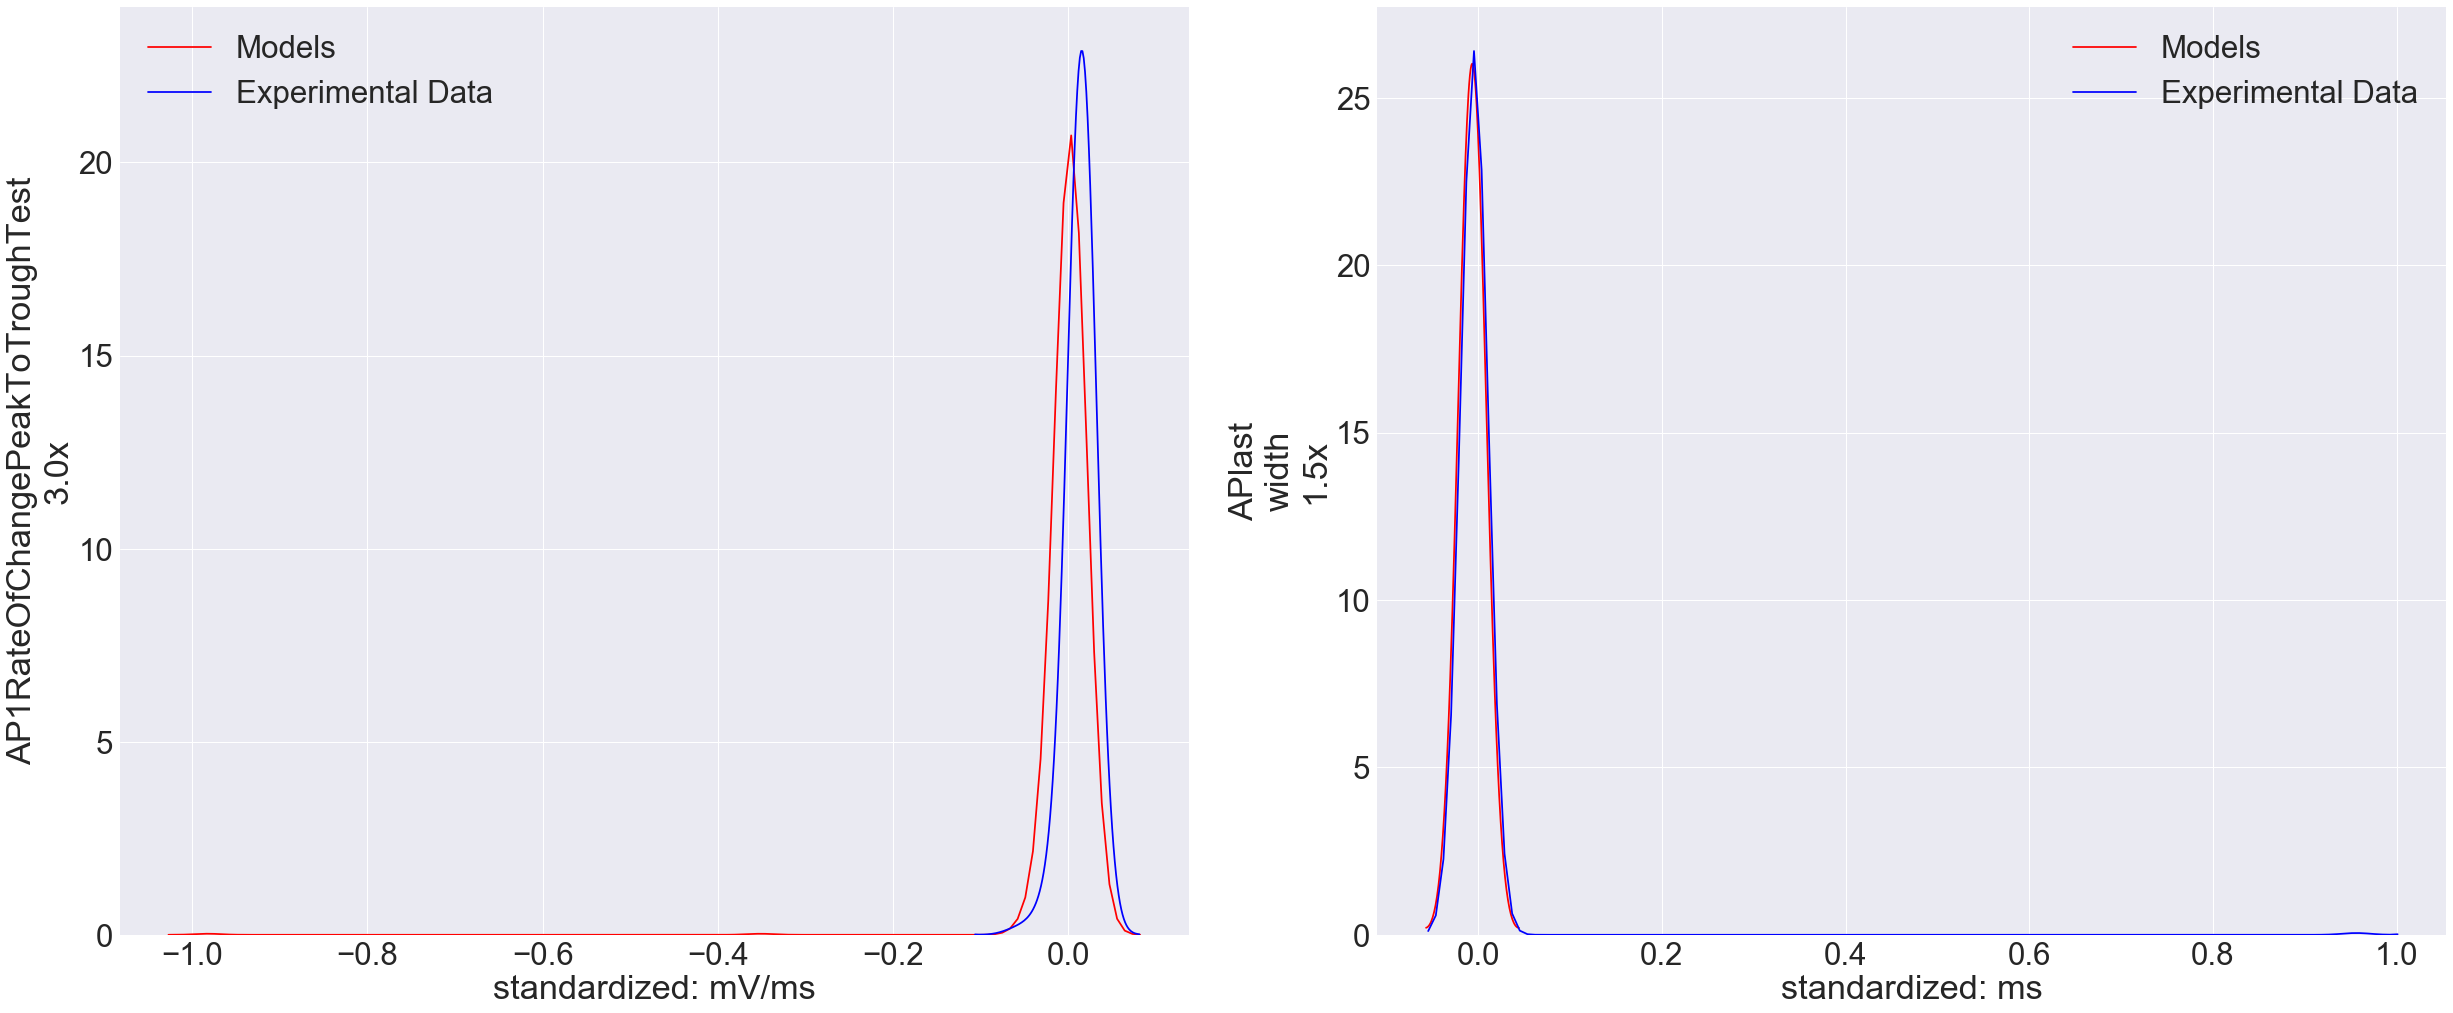

In [52]:

other_two = { 'AP1RateOfChangePeakToTroughTest_3.0x':'mV/ms',  
              'APlast_width_1.5x':'ms'}


n_cols = 2
n_rows = 1
fig, axes = plt.subplots(1,2,figsize=(35, 15))
cnt = 0
for i, (feature,units) in enumerate(other_two.items()):
    cnt+=1
    ax = axes.flat[i]

    n = df.loc[model_index_labels, feature].notnull().sum()
    sns.kdeplot(df.loc[model_index_labels, feature], color='r', ax=ax,bw=0.015,label='Models') # label=('%d' % n)
    sns.kdeplot(df.loc[experiment_idx_labels, feature], color='b', ax=ax,bw=0.015,label='Experimental Data')
    ax.set_ylabel(feature.replace('_', '\n'))
    ax.set_xlabel(str('standardized: ')+str(units))

plt.tight_layout()
#plt.title('Accomodation')

fig.savefig('images/other_two.png')#, format='png', dpi=600)
#print(plt.legend)

# Model Data Agreement

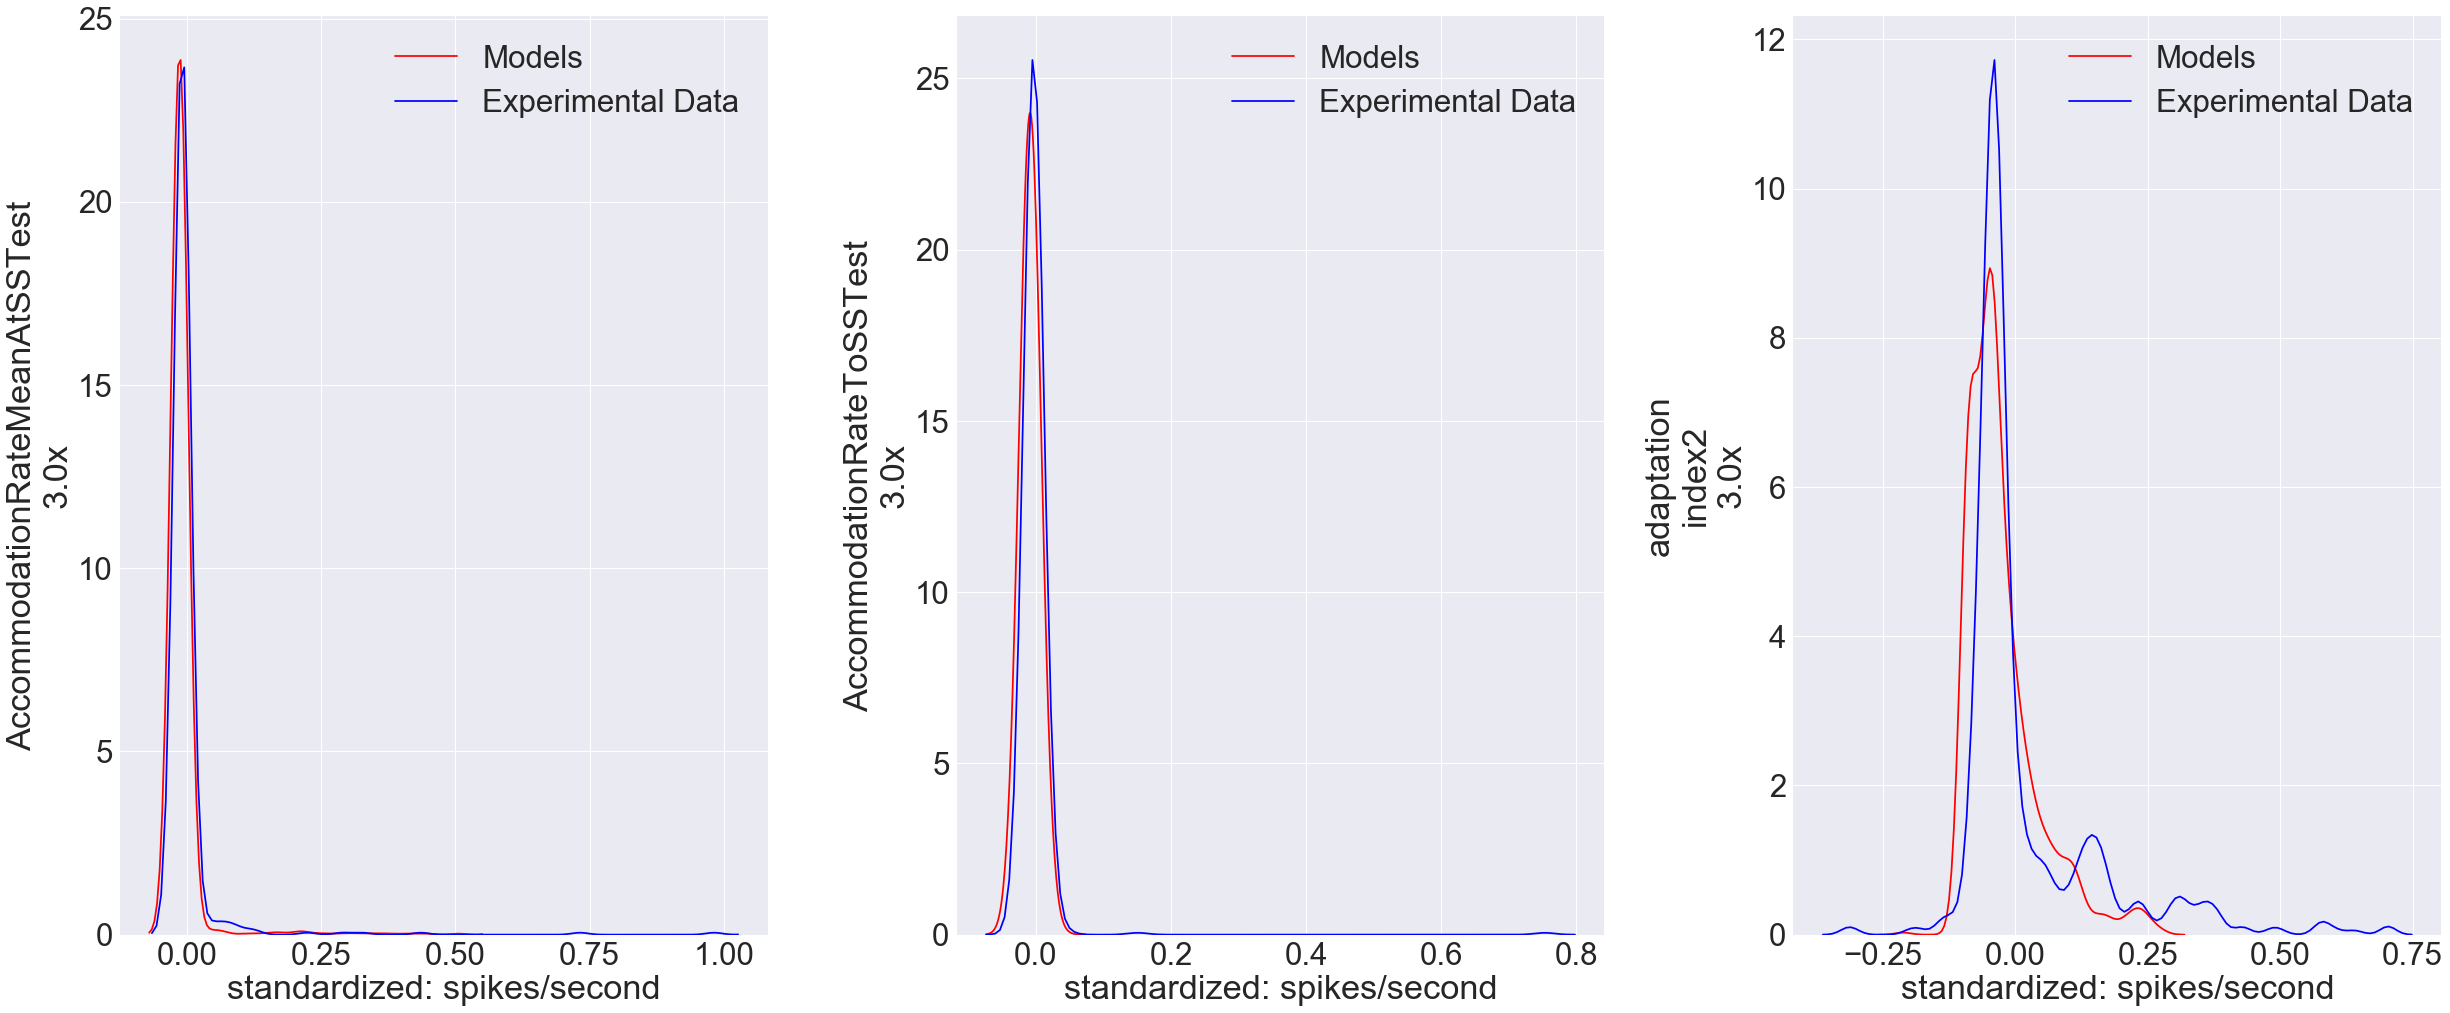

In [53]:


n_cols = 3
n_rows = int(len(accomodation)/3)+1
fig, axes = plt.subplots(1,3,figsize=(35, 15))
cnt = 0
for i, (feature,units) in enumerate(accomodation.items()):
    cnt+=1
    ax = axes.flat[i]

    n = df.loc[model_index_labels, feature].notnull().sum()
    sns.kdeplot(df.loc[model_index_labels, feature], color='r', ax=ax,bw=0.015,label='Models') # label=('%d' % n)
    sns.kdeplot(df.loc[experiment_idx_labels, feature], color='b', ax=ax,bw=0.015,label='Experimental Data')
    ax.set_ylabel(feature.replace('_', '\n'))
    ax.set_xlabel(str('standardized: ')+str(units))

plt.tight_layout()
#plt.title('Accomodation')

fig.savefig('images/accomodation.png')#, format='png', dpi=600)
#print(plt.legend)

# Spike Count

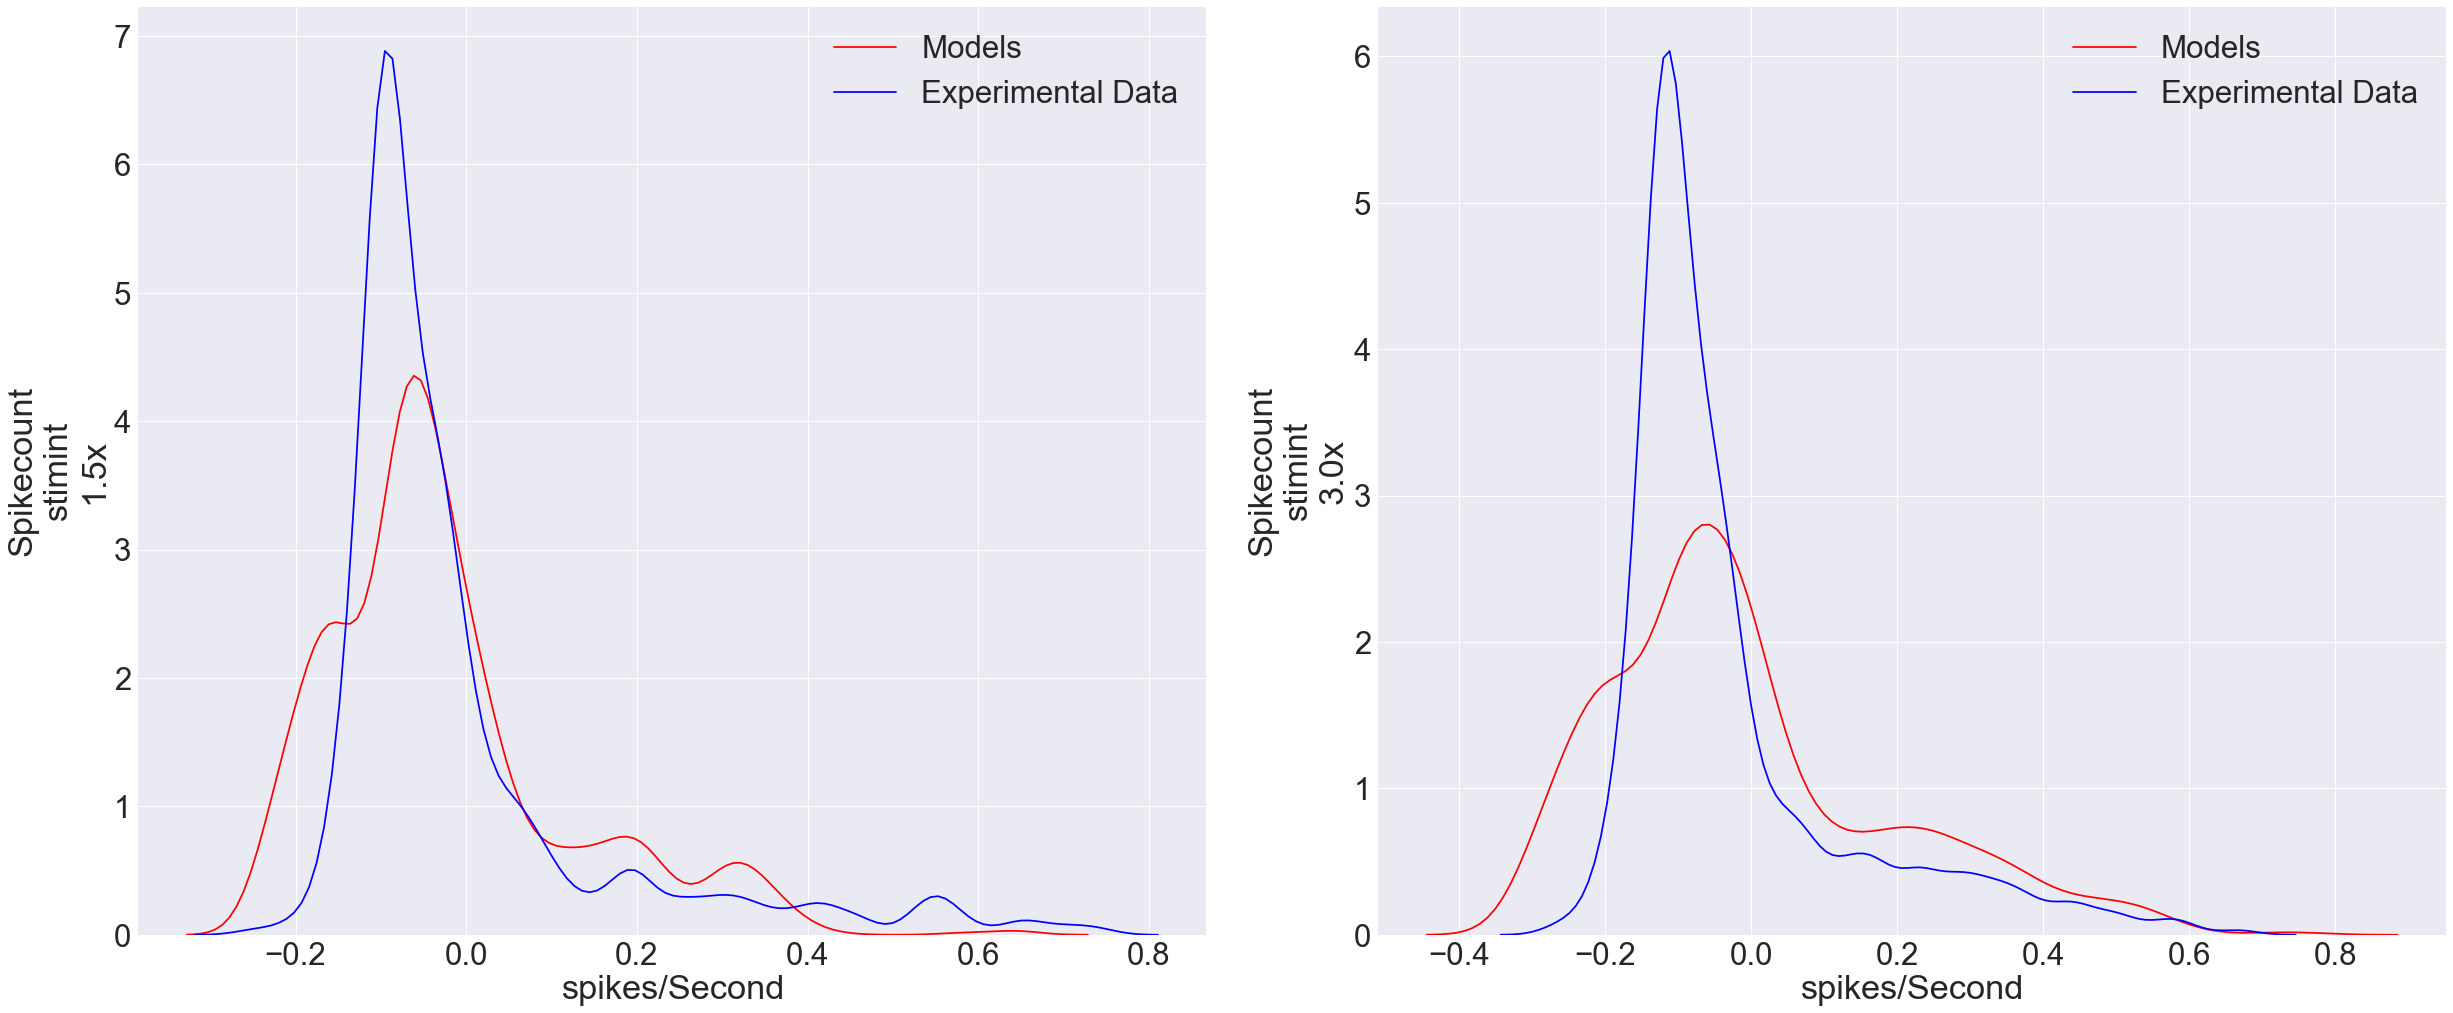

In [54]:

n_cols = 2
n_rows = int(len(rate)/3)+1
fig, axes = plt.subplots(1,n_cols,figsize=(35, 15))
for i, (feature,units) in enumerate(rate.items()):
    ax = axes.flat[i]
    n = df.loc[model_index_labels, feature].notnull().sum()
    sns.kdeplot(df.loc[model_index_labels, feature], color='r', ax=ax,label='Models')
    sns.kdeplot(df.loc[experiment_idx_labels, feature], color='b', ax=ax,label='Experimental Data')
    ax.set_ylabel(feature.replace('_', '\n'))
    ax.set_xlabel(units)
plt.tight_layout()


fig.savefig('images/spike_count.png')#, format='png', dpi=600)


# resistance measurements

In [92]:
%%capture
'''
sns.set(font_scale = 1.25*scaler)

n_cols = 2
n_rows = 2# int(len(resistance)/3)+1
#fig, axes = plt.subplots(n_cols,n_rows,figsize=(25, 15))
fig, axes = plt.subplots(n_rows,n_cols,figsize=(55, 45))
bw=0.045
for i, (feature,units) in enumerate(resistance.items()):
    ax = axes.flat[i]
    n = df.loc[model_index_labels, feature].notnull().sum()
    
    sns.kdeplot(np.abs(df.loc[model_index_labels, feature]), color='r', ax=ax,label='Models')
    sns.kdeplot(np.abs(df.loc[experiment_idx_labels, feature]), color='b', ax=ax,label='Experimental Data')
    ax.set_xlabel(units)#+str("_bandwidth_kernel"+str(bw)))
    ax.set_ylabel(feature.replace('_', '\n'))


fig.savefig('images/input_resistance.pdf', format='pdf', dpi=1200)
    
#plt.tight_layout()    
'''    

# Spike Shape

In [56]:
sns.set(font_scale = 1.25*scaler)

n_cols = 3
n_rows = int(len(spike_shape)/3)+1
plt.clf()
fig, axes = plt.subplots(n_rows,n_cols,figsize=(55, 45))
for i, (feature,units) in enumerate(spike_shape.items()):
    ax = axes.flat[i]
    n = df.loc[model_index_labels, feature].notnull().sum()
    sns.kdeplot(df.loc[model_index_labels, feature], color='r', ax=ax,bw=0.025,label='Models')
    sns.kdeplot(df.loc[experiment_idx_labels, feature], color='b', ax=ax,bw=0.025,label='Experimental Data')
    ax.set_xlabel(units)
    ax.set_ylabel(feature.replace('_', '\n'))
plt.tight_layout()
#plt.title('Spike Time')

fig.savefig('images/spike_shape_time.png', format='png')#, dpi=600)

    

<Figure size 432x288 with 0 Axes>

# shape index

<Figure size 432x288 with 0 Axes>

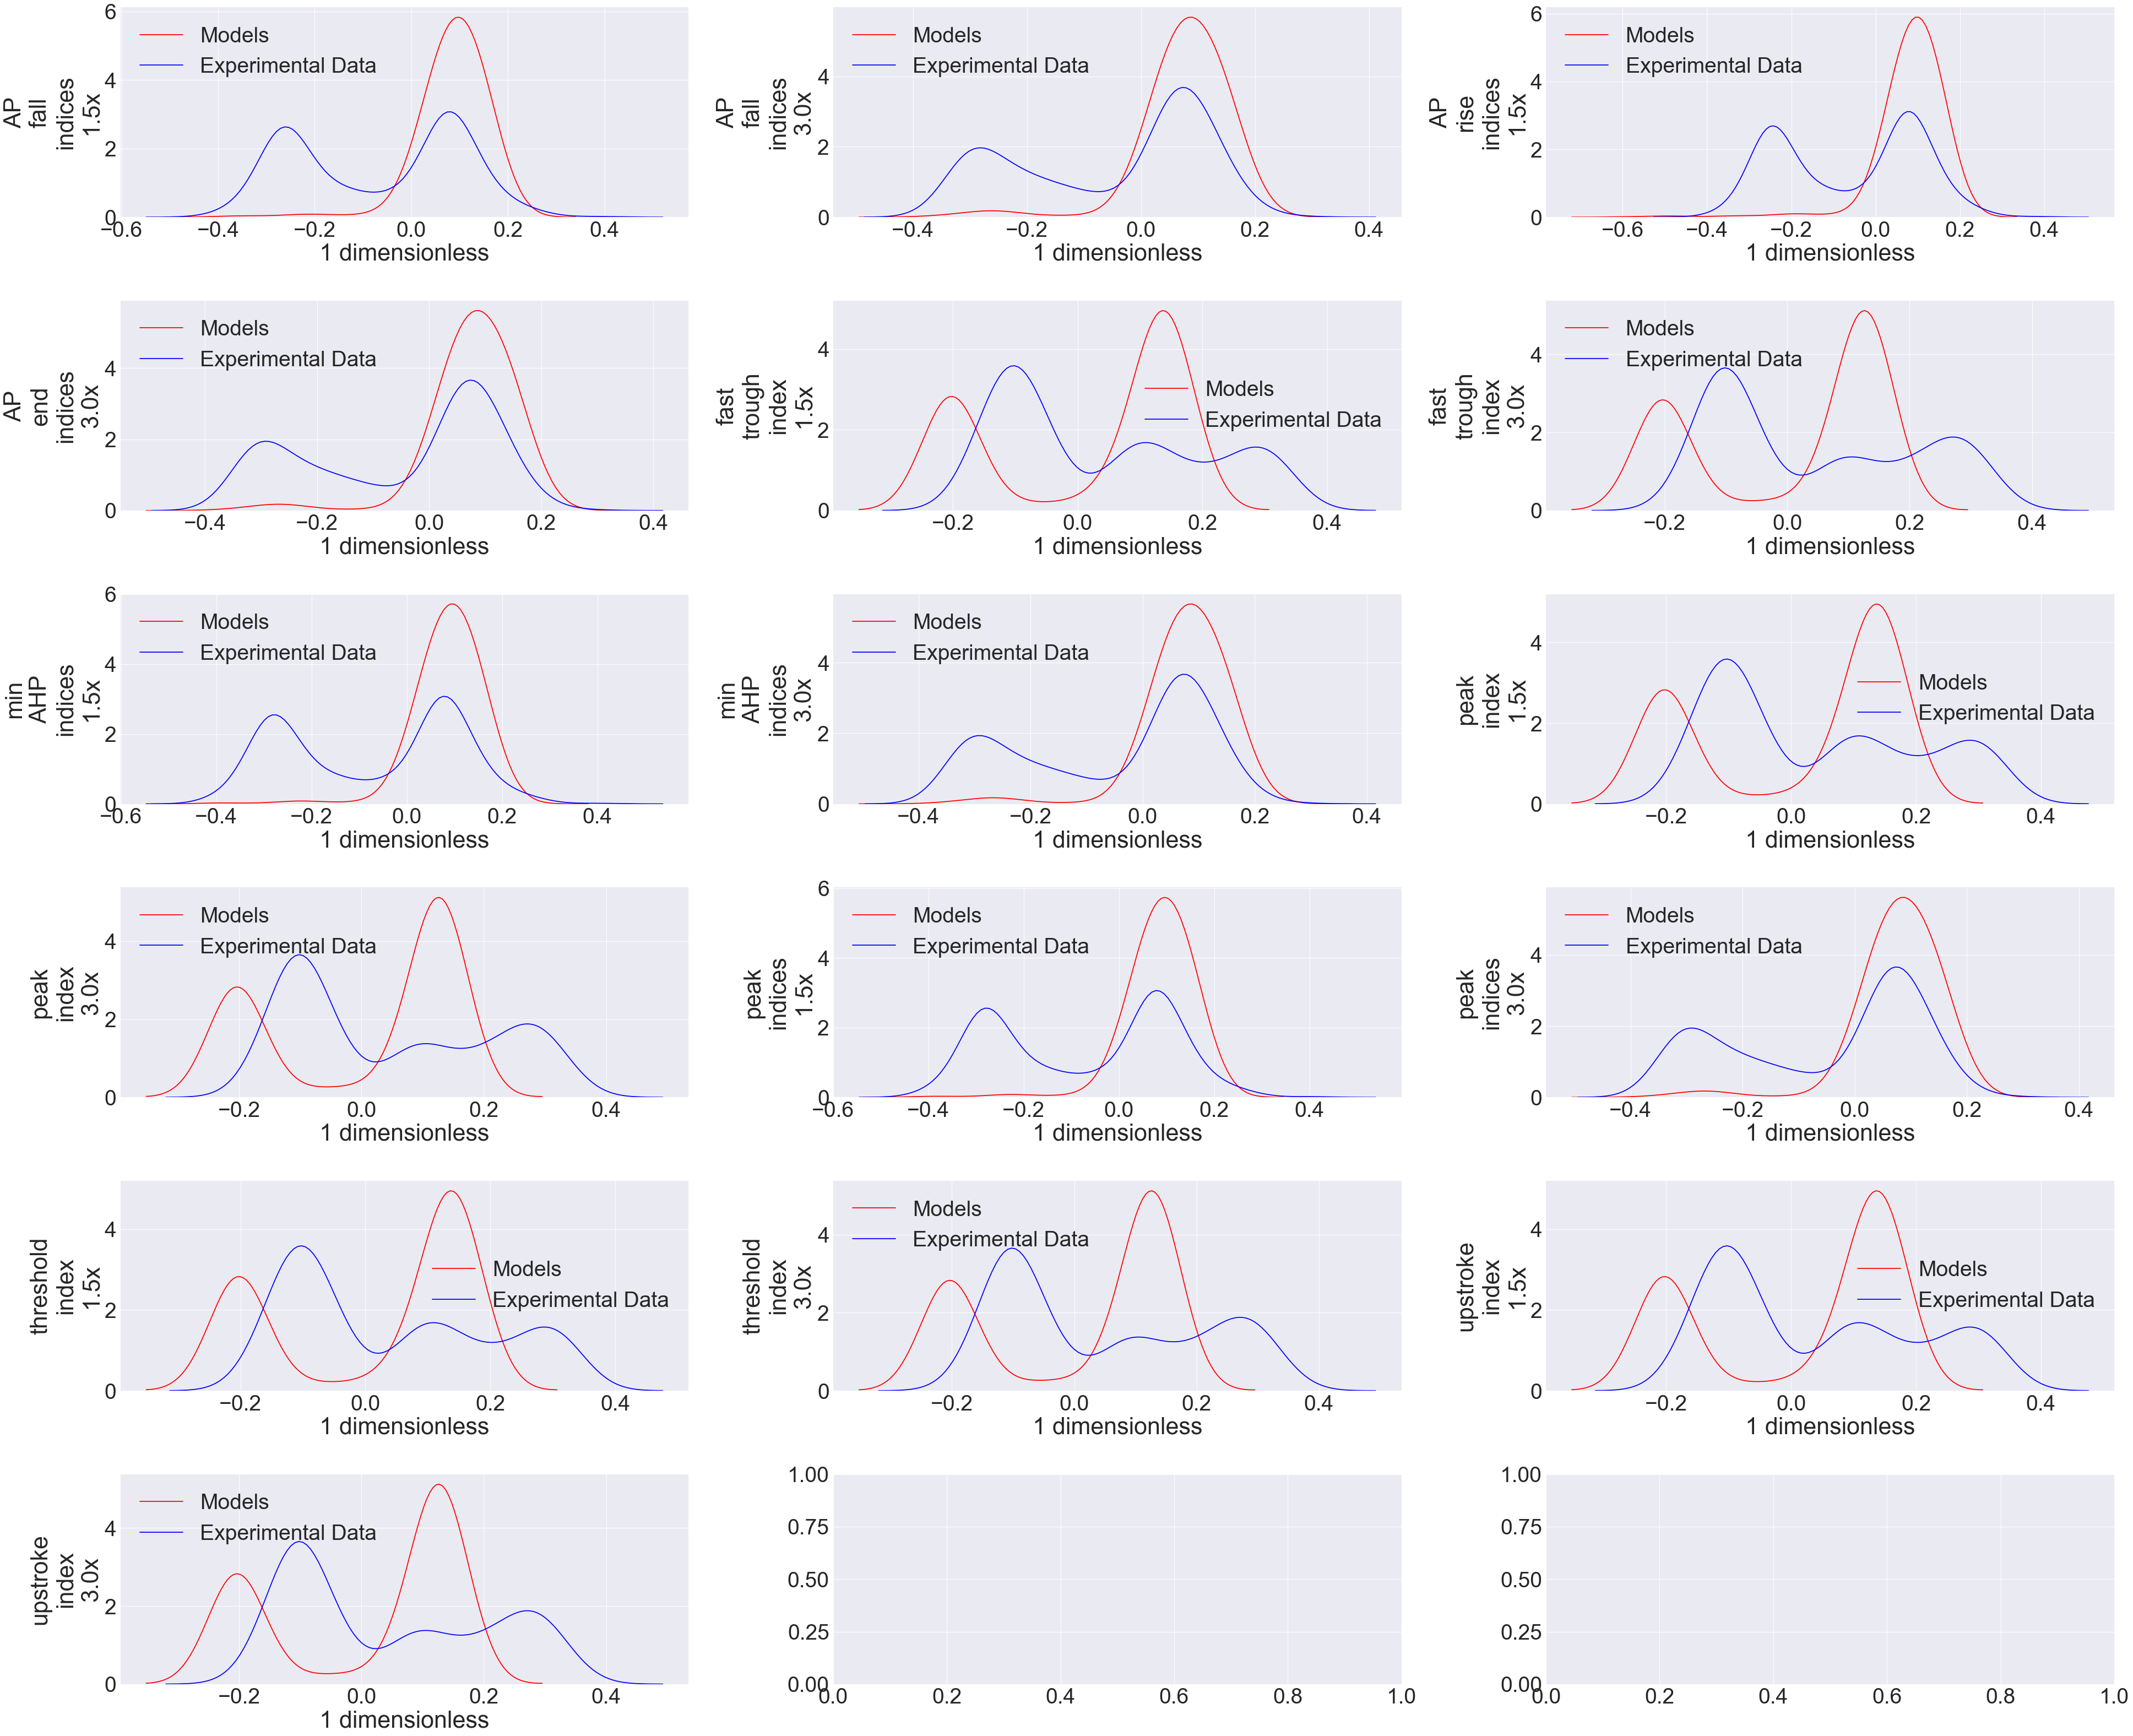

In [57]:
sns.set(font_scale = 1.25*scaler)

n_cols = 3
n_rows = int(len(shape_index)/3)+1
plt.clf()
fig, axes = plt.subplots(n_rows,n_cols,figsize=(55, 45))
for i, (feature,units) in enumerate(shape_index.items()):
    ax = axes.flat[i]
    n = df.loc[model_index_labels, feature].notnull().sum()
    sns.kdeplot(df.loc[model_index_labels, feature], color='r', ax=ax,bw=0.045,label='Models')
    sns.kdeplot(df.loc[experiment_idx_labels, feature], color='b', ax=ax,bw=0.045,label='Experimental Data')
    ax.set_xlabel(units)
    ax.set_ylabel(feature.replace('_', '\n'))
plt.tight_layout()
#plt.title('Relative Time Array Indexs')
fig.savefig('images/spike_shape_index.png', format='png')#, dpi=600)


# In the slide below:
You can see a plot of the high dimensional Druckman feature space projected into a low dimensional space using rotation matrices found via 
a regular PCA algorithm (not T distributed stochastic neighbourhood embedding). 

PCA uses rotated covariance matrices to project original data into the directions where variance in the data is maximum. One disadvantage of this approach is that two of the highest weighted eigenvalues yield synthetic dimensions, synthetic dimensions that are hard to relate back to a just a few of the original Druckman dimensions. 

In this way PCA and TSNE are useful data exploration tools, by the may not always lead to a complete understanding of the data.

In order to circumvent this problem we will use the variance-explained feature of "Random Forest" classification algorithm. Random Forest variance explained, will probably hint at which dimensions comprize the greatest eigenvalues/weights of the PCA algorithm.

3.125


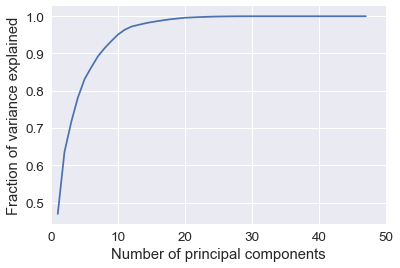

In [58]:

isomap = Isomap(n_components=2)
isomap.fit(copy.copy(df.values))
iso = isomap.embedding_.T

sns.set(font_scale = 1.35)

pca = PCA()

pca.fit(df.values)
n_features = df.shape[1]
transformed = pca.transform(copy.copy(df.values))

default_font_size = mpl.rcParamsDefault['font.size']
mpl.rcParams.update({'font.size': default_font_size})

# Do PCA and look at variance explained
fig = plt.figure()

plt.plot(range(1,n_features+1),pca.explained_variance_ratio_.cumsum())
plt.xlim(0,50);
plt.xlabel('Number of principal components')
plt.ylabel('Fraction of variance explained');
df;




default_fig_size = mpl.rcParamsDefault['figure.figsize']
default_fig_size

figsize=(35, 15)

scaler = figsize[1]/default_fig_size[1]
new_font_size = default_font*scaler

mpl.rcParams.update({'font.size': default_font_size})
sns.set(font_scale = 1.0)
print(scaler)
#iso = iso.T
#iso[0,experiment_idx_labels]

In [59]:
print(np.shape(iso))

(2, 1493)


31.25 10.0


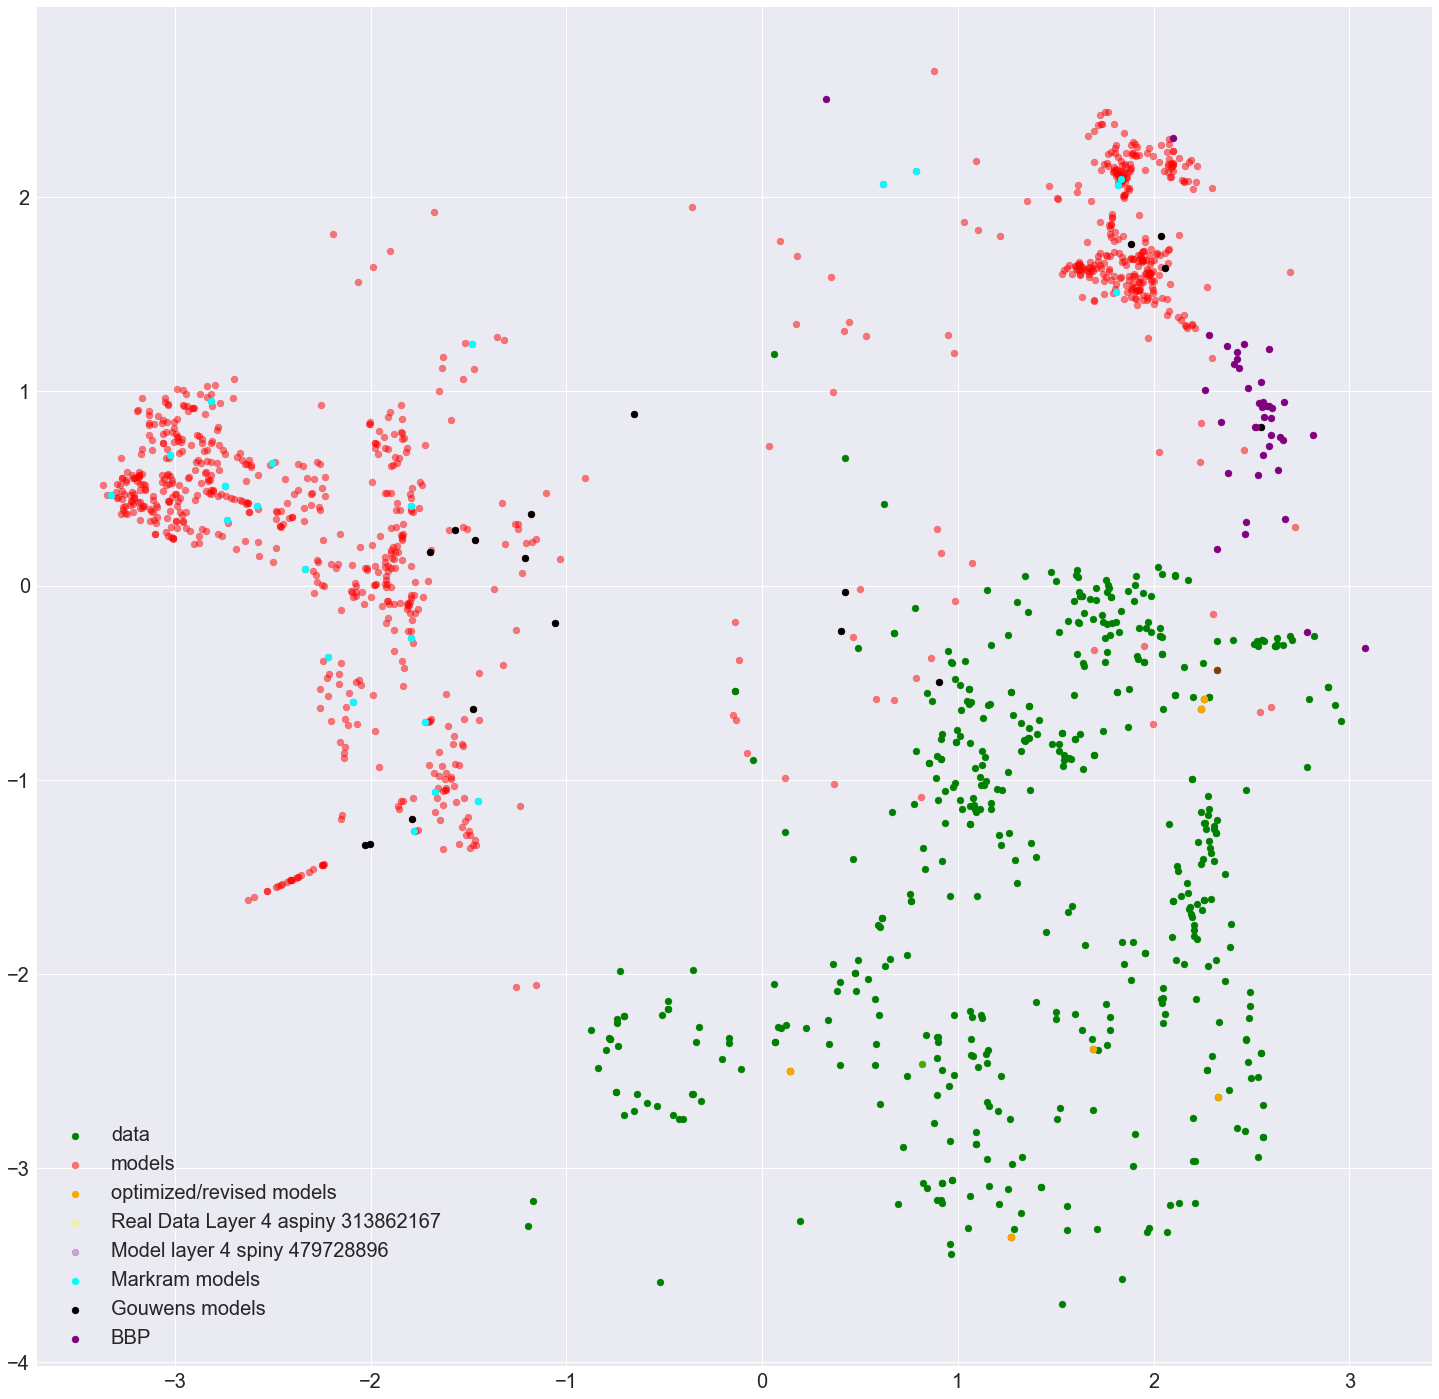

In [60]:
#iso = iso.T
mpl.rcParams.update({'font.size': new_font_size})
print(new_font_size,default_font_size)
sns.set(font_scale = 2.0)

plt = mpl.pyplot
fig, ax = plt.subplots(figsize=(25, 25))

plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='green',cmap='rainbow',label='data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],alpha=0.5,c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='orange',cmap='rainbow',label='optimized/revised models')

plt.scatter(iso[0,experiment_idx_labels][42],iso[1,experiment_idx_labels][42],c='yellow', alpha=0.3,cmap='rainbow',label='Real Data Layer 4 aspiny 313862167')
plt.scatter(iso[0,gouwens_idx_labels][-7],iso[1,gouwens_idx_labels][-7],c='purple', alpha=0.3,cmap='rainbow',label='Model layer 4 spiny 479728896')
plt.scatter(iso[0,markram_idx_labels],iso[1,markram_idx_labels],c='cyan',cmap='rainbow',label='Markram models')


plt.scatter(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
#plt.scatter(iso[0,regular_iz_idx_labels],iso[1,regular_iz_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
plt.scatter(iso[0,bbp],iso[1,bbp],s=50, c='purple',cmap='rainbow',label='BBP')

#plt.scatter(iso[0,:],iso[1,:],c='green',cmap='rainbow',label='data')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")
# I don't love the isomap fit

# the above process not deeply informative.
It looks like the regions are thalamo cortical (Traub)
the regions are Somatosensory (Markram)
the labels belong to regions are Gouwens IV (Mus Musculus)




In [62]:
# standard Normalizer

est = KMeans(n_clusters=4)
est.fit(iso.T)
y_kmeans = est.predict(iso.T)
centers = est.cluster_centers_


Another plot but with Kmeans cluster centers included.
Showing the cluster centres is a first step towards showing that machine classification on the dimension reduced version of the Druckman data feature space.

In the plot below the two large yellow dots are the cluster centres for ***(left models),*** ***(right data)***. The Euclidian distnace from each data point from a cluster centre is directly proportional too which category the data point is from (ie model or data, ie red/blue). This visualization would assist us to understand using KMeans nearist neighbours classification algorithm to classify the data.


IN a Random Forest Classification Analysis performed much further below we  examine the dimension that contributes the most to cluster seperation by looking at variance explained. This gives us an educated guess about dimensions that contribute the most weight to the axis of the PCA projection spaces plotted above.

It is likely that the axis in the PCA plot below, are strongly aligned with "Input Resistance" in models and data, as well as "AP2RateOfChangePeakToTroughTest". This second dimension means considering multi-spiking waveforms observed in models and data, at the second Action Potential/Spike, how rapid is the decay from peak to trough of the second AP wave.

<Figure size 432x288 with 0 Axes>

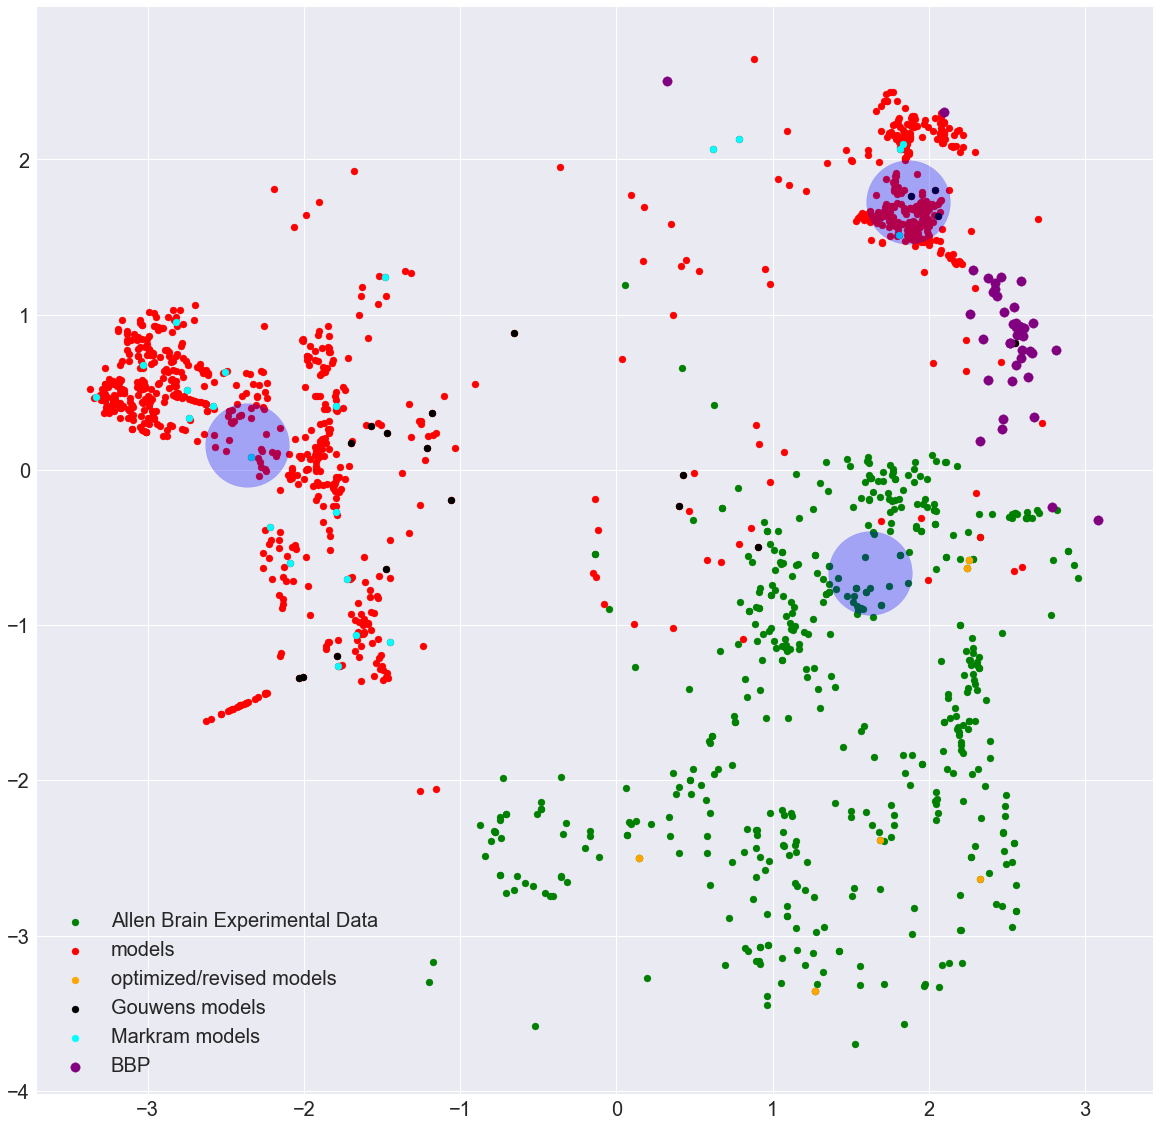

In [63]:
sns.set(font_scale = 2.0)

plt.clf()
fig = plt.figure(figsize=(20,20))
#mpl.rcParams.update({'font.size': new_font_size})
#print(new_font_size,default_font_size)

ax = plt.subplot(111)
#mpl.rcParams.update({'font.size': new_font_size})

plt.scatter(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],c='green',cmap='rainbow',label='Allen Brain Experimental Data')
plt.scatter(iso[0,model_index_labels],iso[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(iso[0,new_model_labels],iso[1,new_model_labels],c='orange',cmap='rainbow',label='optimized/revised models')
plt.scatter(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
plt.scatter(iso[0,markram_idx_labels],iso[1,markram_idx_labels],c='cyan',cmap='rainbow',label='Markram models')
plt.scatter(iso[0,bbp],iso[1,bbp],s=90, c='purple',cmap='rainbow',label='BBP')
#plt.scatter(iso[0,:],iso[1,:],s=10, c='purple',cmap='rainbow',label='BBP')

plt.scatter(centers[0][0],centers[0][1],s=7000,c='blue', alpha=0.3, edgecolors='blue')#,label='cluster 1')
plt.scatter(centers[1][0],centers[1][1],s=7000,c='blue', alpha=0.3,edgecolors='blue')#,label='cluster 2')
plt.scatter(centers[2][0],centers[2][1],s=7000,c='blue', alpha=0.3,edgecolors='blue')#,label='cluster 3')
#plt.scatter(centers[3][0],centers[3][1],s=7000,c='blue', alpha=0.3,edgecolors='blue')#,label='cluster 3')

legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")


In [64]:
trace7=([iso[0,bbp]],[iso[1,bbp]],'BBP',bbp)


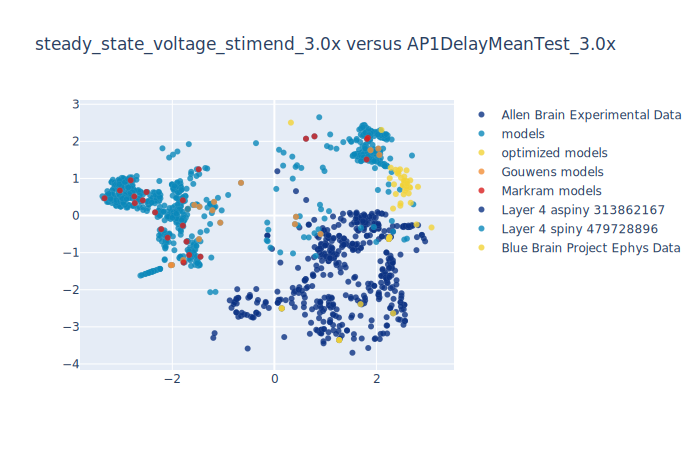

In [65]:

data = []
trace0=(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],'Allen Brain Experimental Data',experiment_idx)
trace1=(iso[0,model_index_labels],iso[1,model_index_labels],'models',model_idx)
trace2=(iso[0,new_model_labels],iso[1,new_model_labels],'optimized models',new_models_idx)
trace3=(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],'Gouwens models',gouwens_idx)
trace4=(iso[0,markram_idx_labels],iso[1,markram_idx_labels],'Markram models',markram_idx)

trace5=([iso[0,experiment_idx_labels][42]],[iso[1,experiment_idx_labels]],'Layer 4 aspiny 313862167',experiment_idx_labels)
trace6=([iso[0,gouwens_idx_labels][-7]],[iso[1,gouwens_idx_labels][-7]],'Layer 4 spiny 479728896',gouwens_idx_labels)
#plt.scatter(iso[0,regular_iz_idx_labels],iso[1,regular_iz_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
#trace7=([iso[0,regular_iz_idx_labels]],[iso[1,regular_iz_idx_labels]],'regular_iz_idx_labels',regular_iz_idx_labels)
#trace7=([iso[0,bbp]],[iso[1,bbp]],'BBP',df[bbpindex].index.values)
trace7=(iso[0,bbp],iso[1,bbp],'Blue Brain Project Ephys Data',df[bbpindex].index.values)
trace8=(iso[0,traub_idx_labels],iso[1,traub_idx_labels],'Traub',traub_idx_labels)

#plt.scatter(iso[0,bbp_labels],iso[1,bbp_labels],s=10, c='purple',cmap='rainbow',label='BBP')

traces = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7]#,trace8]
cnt=0
theme = px.colors.diverging.Portland

for i,ttt in enumerate(traces):
    if cnt==len(theme):
        cnt=0
    if i>1:
        size = 6
    else:
        size = 6
        #if type(ttt[3]) is not type(str()):
        
  
    trace = dict(
        type='scatter',
        text = df[df.index.isin(ttt[3])].index,
        x=ttt[0],
        y=ttt[1],
        mode='markers',
        name=ttt[2],
        marker=dict(
            color=theme[cnt],
            size=size,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
    )
    data.append(trace)
    cnt+=1



fig = go.Figure(
    data=data,
    layout_title_text="steady_state_voltage_stimend_3.0x versus AP1DelayMeanTest_3.0x"
)#,

fig.update_layout(
    autosize=False,
    width=1050,
    height=1050
)


if GITHUB:
    fig.show("svg")
    
    #fig.write_image("images/fig1.pdf")
    pio.write_image(fig,file='images/no_classification.png',format='png')#,width=1050,height=1050)
    fig.write_html("images/tsne_no_classifier.html")


else:
    pio.show(fig)

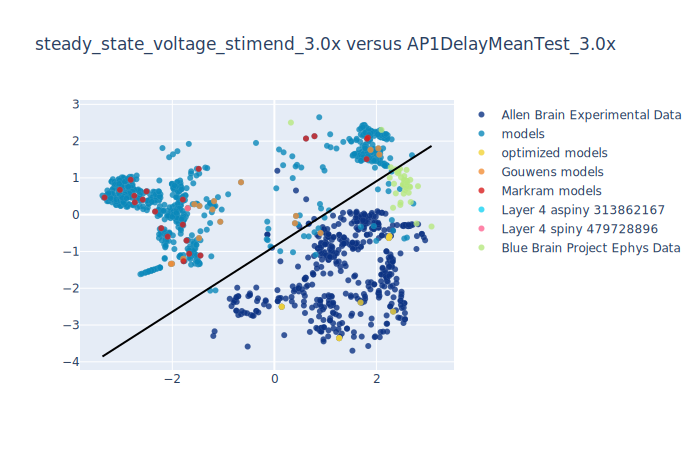

In [66]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

data = []
trace0=(iso[0,experiment_idx_labels],iso[1,experiment_idx_labels],'Allen Brain Experimental Data',experiment_idx)
trace1=(iso[0,model_index_labels],iso[1,model_index_labels],'models',model_idx)
trace2=(iso[0,new_model_labels],iso[1,new_model_labels],'optimized models',new_models_idx)
trace3=(iso[0,gouwens_idx_labels],iso[1,gouwens_idx_labels],'Gouwens models',gouwens_idx)
trace4=(iso[0,markram_idx_labels],iso[1,markram_idx_labels],'Markram models',markram_idx)

trace5=([iso[0,experiment_idx_labels][42]],[iso[1,experiment_idx_labels]],'Layer 4 aspiny 313862167',experiment_idx_labels)
trace6=([iso[0,gouwens_idx_labels][-7]],[iso[1,gouwens_idx_labels][-7]],'Layer 4 spiny 479728896',gouwens_idx_labels)
#plt.scatter(iso[0,regular_iz_idx_labels],iso[1,regular_iz_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
#trace7=([iso[0,regular_iz_idx_labels]],[iso[1,regular_iz_idx_labels]],'regular_iz_idx_labels',regular_iz_idx_labels)
#trace7=([iso[0,bbp]],[iso[1,bbp]],'BBP',df[bbpindex].index.values)
trace7=(iso[0,bbp],iso[1,bbp],'Blue Brain Project Ephys Data',df[bbpindex].index.values)
#trace7=(iso[0,bbp],iso[1,bbp],'Blue Brain Project Ephys Data',df[bbpindex].index.values)

#plt.scatter(iso[0,bbp_labels],iso[1,bbp_labels],s=10, c='purple',cmap='rainbow',label='BBP')

traces = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,None]

groundtruth = np.array(df.index.isin(experiment_idx))


classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(iso.T, groundtruth)
min_x = np.min(iso[0,:])
max_x = np.max(iso[0,:])
w = classif.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min_x, max_x)  # make sure the line is long enough
yy = a * xx - (classif.intercept_[0]) / w[1]


cnt=0

used_columns = df.columns
pal = sns.husl_palette(8, s=.45)
lut = dict(zip(map(str, used_columns), pal))
colors = pd.Series(used_columns, index=df.columns).map(lut)
theme = px.colors.diverging.Portland
theme.extend(colors[15:-1])
for i,ttt in enumerate(traces):
    #if cnt==len(theme):
    #    cnt=0
    size = 6
    if i>1:
        pass
        #size = 12
    else:
        size = 6
        text = df[df.index.isin(ttt[3])].index
  

    
    if ttt==None:
        trace = {
          "line": {
            "dash": "solid", 
            "color": "rgb(0,0,0)", 
            "shape": "linear", 
            "width": 2
          }, 
          "mode": "lines", 
          "name": "Decision Boundary", 
          "text": "Decision Boundary", 
          "type": "scatter", 
          "x": xx, 
          "y": yy,
          "yaxis": "y1", 
          "showlegend": False
        }
    else:
        trace = dict(
        type='scatter',
        text=text,
        x=ttt[0],
        y=ttt[1],
        mode='markers',
        name=ttt[2],
        marker=dict(
            color=theme[cnt],
            size=size,
            line=dict(
                color='rgba(217, 217, 217, 0.14)',
                width=0.5),
            opacity=0.8)
        )
    cnt+=1
    data.append(trace)




fig = go.Figure(
    data=data,
    layout_title_text="steady_state_voltage_stimend_3.0x versus AP1DelayMeanTest_3.0x"
)#,

fig.update_layout(
    autosize=False,
    width=2050,
    height=2050
)

if GITHUB:
    fig.show("svg")
    #fig.write_image("images/discriminator.pdf")
    pio.write_image(fig,file='images/iso_classifier.png',format='png',width=1050,height=1050)
    fig.write_html("images/iso_tsne_classifier.html")

else:
    pio.show(fig)
    
    

In [67]:
bbp_idx_labels
text = df[df.index.isin(bbp_idx_labels)].index
text;

In [68]:
# Do a TSNE embedding in two dimensions

tsne = TSNE(n_components=2, perplexity=30)
tsne.fit(df.values)
x = tsne.embedding_.T


classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(x.T, groundtruth)
min_x = np.min(x[0,:])
max_x = np.max(x[0,:])
w = classif.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min_x, max_x)  # make sure the line is long enough
yy = a * xx - (classif.intercept_[0]) / w[1]

plt.clf()
fig = plt.figure(figsize=(20,20))
ax = plt.subplot(111)
plt.scatter(x[0,experiment_idx_labels],x[1,experiment_idx_labels],c='blue',cmap='rainbow',label='data')
plt.scatter(x[0,model_index_labels],x[1,model_index_labels],c='red',cmap='rainbow',label='models')
plt.scatter(x[0,new_model_labels],x[1,new_model_labels],c='green',cmap='rainbow',label='optimized models')
plt.scatter(x[0,gouwens_idx_labels],x[1,gouwens_idx_labels],c='black',cmap='rainbow',label='Gouwens models')
plt.scatter(x[0,markram_idx_labels],x[1,markram_idx_labels],c='orange',s=100, cmap='rainbow',label='Markram models')

plt.scatter(x[0,experiment_idx_labels][42],x[1,experiment_idx_labels][42],s=700,c='purple', alpha=0.3,cmap='rainbow',label='Layer 4 aspiny 313862167')

plt.scatter(x[0,gouwens_idx_labels][-7],x[1,gouwens_idx_labels][-7],s=700,c='purple', alpha=0.3,cmap='rainbow',label=' layer 4 spiny 479728896')
plt.scatter(x[0,bbp],x[1,bbp],s=90, c='purple',cmap='rainbow',label='BBP')
#plt.plot(xx,yy)
#except:
#    pass
legend = ax.legend()#handles, labels, loc="upper right", title="Sizes")
plt.show()

<Figure size 432x288 with 0 Axes>

# now lets look at how clustered the tests are.

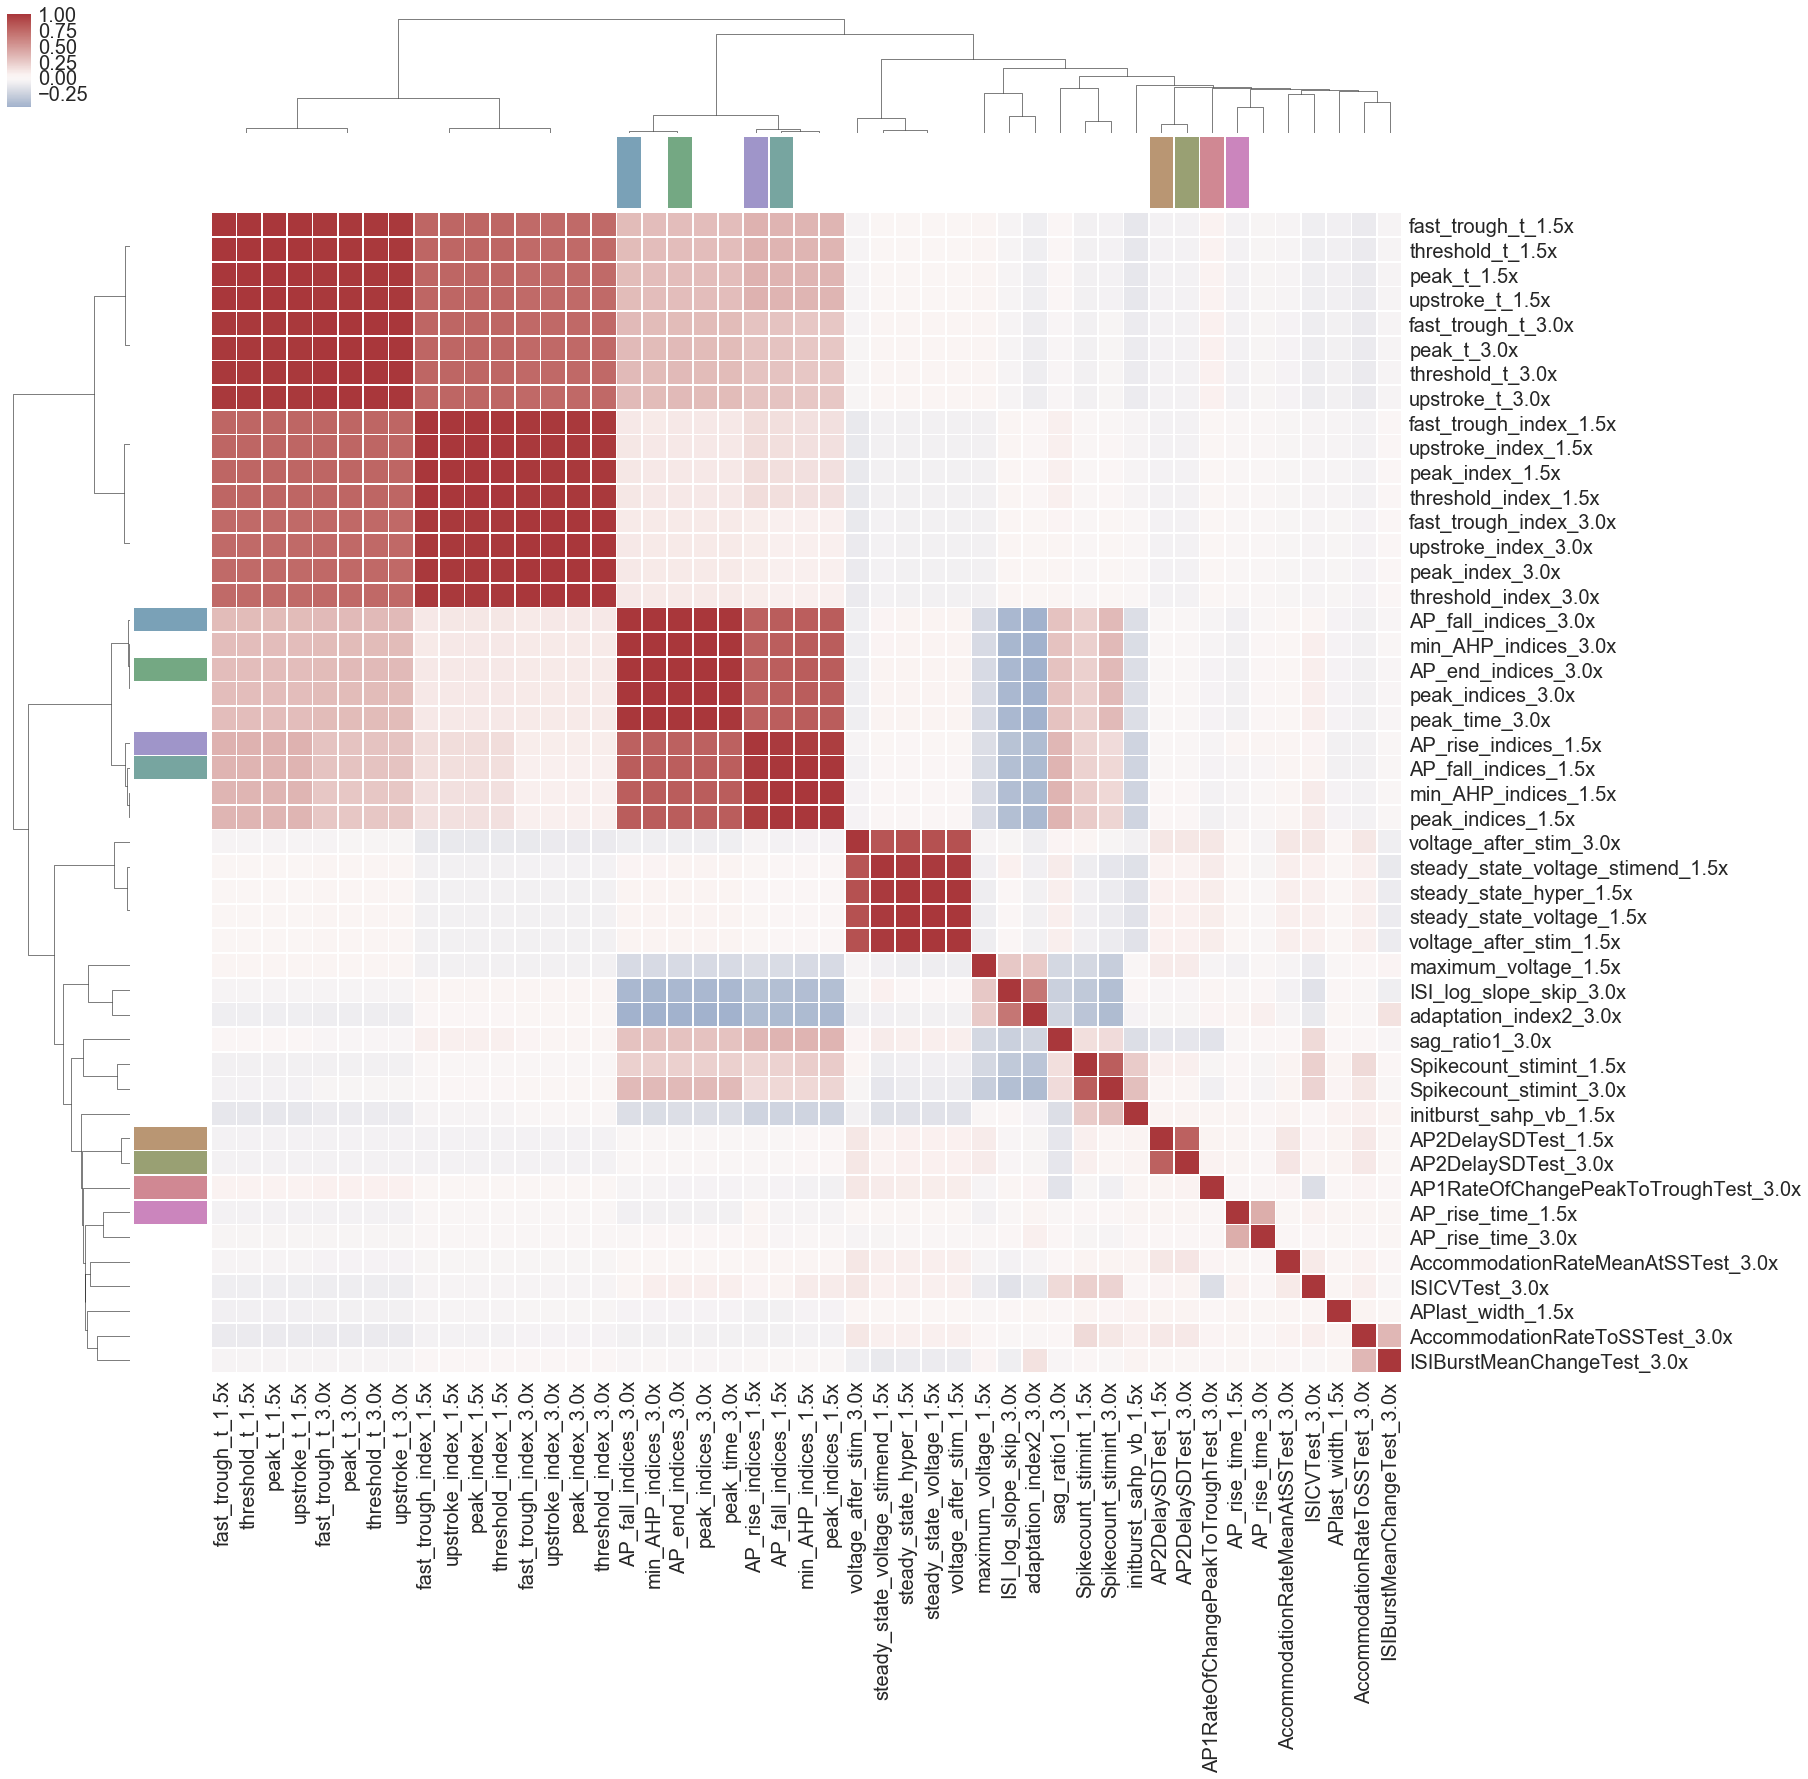

In [69]:
used_columns = df.columns
# Create a categorical palette to identify the networks
pal = sns.husl_palette(8, s=.45)
lut = dict(zip(map(str, used_columns), pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
#networks = df.columns.get_level_values("network")
colors = pd.Series(used_columns, index=df.columns).map(lut)
#plt.clf()
#fig, axes = plt.subplots(1,1,figsize=(25, 25))
# Draw the full plot
fig = sns.clustermap(df.corr(), center=0, cmap="vlag",
               row_colors=colors, col_colors=colors,
               linewidths=.75, figsize=(25, 25))

#fig = sns.get_figure()
#fig.savefig("output.png")
fig.savefig('images/cluster_gram_feature_vs_feature.png', format='png')#, dpi=600)


In [70]:
temp = df.T.corr()
temp;
#sns.clustermap(temp, figsize=(25, 25))
used_columns = df.index
# Create a categorical palette to identify the networks
pal = sns.husl_palette(8, s=.45)
lut = dict(zip(map(str, used_columns), pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
#networks = df.columns.get_level_values("network")
colors = pd.Series(used_columns, index=temp.index).map(lut)

# Draw the full plot
fig = sns.clustermap(temp, center=0, cmap="vlag",linewidths=.000095,
               row_colors=colors, col_colors=colors, figsize=(23,23))
fig.savefig('images/clustergram_model_versus_model.png', format='png')#, dpi=600)


In [71]:
import plotly.express as px
import plotly.graph_objects as go

data = []
trace0=(x[0,experiment_idx_labels],x[1,experiment_idx_labels],'Allen Brain Ephys Data',experiment_idx)
trace1=(x[0,model_index_labels],x[1,model_index_labels],'models',model_idx)
trace2=(x[0,new_model_labels],x[1,new_model_labels],'optimized models',new_models_idx)
trace3=(x[0,gouwens_idx_labels],x[1,gouwens_idx_labels],'Gouwens models',gouwens_idx)
trace4=(x[0,markram_idx_labels],x[1,markram_idx_labels],'Markram models',markram_idx)
trace7=(x[0,bbp],x[1,bbp],'Blue Brain Project Ephys Data',bbp_idx_labels)

trace5=([x[0,experiment_idx_labels][42]],[x[1,experiment_idx_labels]],'Layer 4 aspiny 313862167',experiment_idx_labels)
trace6=([x[0,gouwens_idx_labels][-7]],[x[1,gouwens_idx_labels][-7]],'Layer 4 spiny 479728896',gouwens_idx_labels)

# trace7=([iso[0,gouwens_idx_labels][-7]],[iso[1,gouwens_idx_labels][-7]],'Layer 4 spiny 479728896',gouwens_idx_labels)
#plt.scatter(iso[0,bbp_labels],iso[1,bbp_labels],s=10, c='purple',cmap='rainbow',label='BBP')
trace7=(x[0,bbp],x[1,bbp],'Blue Brain Project Ephys Data',df[bbpindex].index.values)

classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(x.T, groundtruth)
min_x = np.min(x[0, :])
max_x = np.max(x[0, :])
w = classif.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(min_x, max_x)  # make sure the line is long enough
yy = a * xx - (classif.intercept_[0]) / w[1]



used_columns = df.columns
pal = sns.husl_palette(8, s=.45)
lut = dict(zip(map(str, used_columns), pal))
colors = pd.Series(used_columns, index=df.columns).map(lut)


traces = [trace0,trace1,trace2,trace3,trace4,trace5,trace6,trace7,None]
cnt=0
theme = px.colors.diverging.Portland
for i,ttt in enumerate(traces):
    if cnt==len(theme):
        cnt=0
    if i>1 and i!=7:
        pass
        #size = 12
    else:
        size = 6
        
    if i==8:
        trace = {
          "line": {
            "dash": "solid", 
            "color": "rgb(0,0,0)", 
            "shape": "linear", 
            "width": 2
          }, 
          "mode": "lines", 
          "name": "Decision Boundary", 
          "text": "Decision Boundary", 
          "type": "scatter", 
          "x": xx, 
          "y": yy,
          "yaxis": "y1", 
          "showlegend": False
        }
    else:
        trace = dict(
            type='scatter',
            text = df[df.index.isin(ttt[3])].index,
            x=ttt[0],
            y=ttt[1],
            mode='markers',
            name=ttt[2],
            marker=dict(
                color=theme[cnt],
                size=size,
                line=dict(
                    color='rgba(217, 217, 217, 0.14)',
                    width=0.5),
                opacity=0.8)
        )
    data.append(trace)
    cnt+=1


layout = go.Layout(yaxis=dict(range=[-50, 50]))
fig = go.Figure(
    data=data, layout=layout
)

#layout = {'scene': {'xaxis': {'showspikes': False}}}
fig.update_layout(
    autosize=False,
    width=1050,
    height=1050
)

if GITHUB:
    fig.show("svg")
    pio.write_image(fig,file='images/tsne_classifier.png',format='png')#,width=600,height=600)

    #fig.show("svg")
    #pio.write_image(fig,file='images/tsne_classifier.webp',format='webp')#,width=600,height=600)
    fig.write_html("images/tsne_classifier.html")
    
else:
    pio.show(fig)

### t-SNE 
The TSNE plot does a better job of spatially sperating experimental data from theoretical models in dimension reduced Druckman feature space.




In [72]:
new_model_labels

array([ True,  True,  True, ..., False, False, False])

*Finally we  examine the dimension that contributes the most to cluster seperation by looking at variance explained. This gives us an educated guess about dimensions that contribute the most weight to the axis of the PCA projection spaces plotted above.

Note to self, experimental_index needs updtating to include BBP cells.


In [73]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
#from sklearn.ensemble import RandomForestClassifier

df_models = df[~df.index.isin(experiment_idx)]
df_data = df[df.index.isin(experiment_idx)]
# Assume they have the same columns

df_combined = pd.concat([df_data, df_models])

groundtruth = np.array(df.index.isin(experiment_idx))
rfc = RandomForestClassifier()
X = df_combined.values
rfc.fit(X, groundtruth)

importances = pd.Series(index = df_combined.columns, data=rfc.feature_importances_)
groundtruth[-9:-1]

print(importances.sort_values(ascending=False)[0:9])


threshold_index_3.0x                    0.071
sag_ratio1_3.0x                         0.070
AccommodationRateToSSTest_3.0x          0.068
fast_trough_index_1.5x                  0.066
fast_trough_t_3.0x                      0.055
AP1RateOfChangePeakToTroughTest_3.0x    0.054
AP_rise_indices_1.5x                    0.051
threshold_t_1.5x                        0.050
threshold_t_3.0x                        0.049
dtype: float64


In [74]:

df_models = df[~df.index.isin(experiment_idx)]
df_data = df[df.index.isin(experiment_idx)]
# Assume they have the same columns

df_combined = pd.concat([df_data, df_models])

groundtruth = np.array(df.index.isin(experiment_idx))
rfc = RandomForestClassifier()
X = df_combined.values
rfc.fit(X, groundtruth)

importances = pd.Series(index = df_combined.columns, data=rfc.feature_importances_)
groundtruth[-9:-1]

print(importances.sort_values(ascending=False)[0:9])


sag_ratio1_3.0x                         0.165
AP_rise_indices_1.5x                    0.084
AP1RateOfChangePeakToTroughTest_3.0x    0.072
upstroke_index_1.5x                     0.065
AP2DelaySDTest_1.5x                     0.056
threshold_index_1.5x                    0.050
AccommodationRateToSSTest_3.0x          0.043
peak_t_3.0x                             0.043
AP2DelaySDTest_3.0x                     0.035
dtype: float64


# make four regions for ground truth
for a region dependent classification with four regions (0,1,2,3)

Gouwens and Allen 0
Markram and BBP 1
Hippocampus 2
Thalamocortical 3

In [75]:

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

df_models = df[~df.index.isin(experiment_idx)]
df_data = df[df.index.isin(experiment_idx)]
# Assume they have the same columns

df_combined = pd.concat([df_data, df_models])

groundtruth = np.array(df.index.isin(experiment_idx))
rfc = RandomForestClassifier()
X = df_combined.values
rfc.fit(X, groundtruth)

importances = pd.Series(index = df_combined.columns, data=rfc.feature_importances_)
groundtruth[-9:-1]

print(importances.sort_values(ascending=False)[0:9])

sag_ratio1_3.0x                   0.255
AP_fall_indices_1.5x              0.060
AccommodationRateToSSTest_3.0x    0.055
fast_trough_index_1.5x            0.047
threshold_index_3.0x              0.045
fast_trough_index_3.0x            0.043
peak_indices_1.5x                 0.036
peak_index_3.0x                   0.036
upstroke_index_1.5x               0.034
dtype: float64


In [79]:

plt.clf()
plt.scatter(df_data['sag_ratio1_3.0x'], df_data['AP1RateOfChangePeakToTroughTest_3.0x'],label='experimental data')
plt.scatter(df_models['sag_ratio1_3.0x'], df_models['AP1RateOfChangePeakToTroughTest_3.0x'],label='models')

plt.xlabel('sag_ratio1_3.0x')
plt.ylabel('ohmic_input_resistance_3.0x')
plt.legend()
plt.show()


In [80]:

def crawl_ids(url):
    ''' move to aibs '''
    all_data = requests.get(url)
    all_data = json.loads(all_data.text)
    Model_IDs = []
    for d in all_data:
        Model_ID = str(d['Model_ID'])
        Model_IDs.append(Model_ID)
    return Model_IDs

import glob 
import pickle
import json 
import requests
#import get_three_feature_sets_from_nml_db as runnable_nml
#from get_three_feature_sets_from_nml_db import analyze_models_from_cache
#from neuronunit.get_three_feature_sets_from_nml_db import crawl_ids
def download_intensives():


    list_to_get =[ str('https://neuroml-db.org/api/search?q=traub'),
        str('https://neuroml-db.org/api/search?q=markram'),
        str('https://neuroml-db.org/api/search?q=Gouwens') ]
    regions = {}
    for url in list_to_get:
        Model_IDs = crawl_ids(url)
        for Model_ID in Model_IDs:
            url = str("https://neuroml-db.org/api/model?id=")+Model_ID
            try:            
                model_contents = requests.get(url)
                model_contents = json.loads(model_contents.text)
                regions[Model_ID] = model_contents['keywords'][0]['Other_Keyword_term']

            except:
                pass

            #print(regions)
            with open('regions.p','wb') as f:
                pickle.dump(regions,f)
    return regions


                


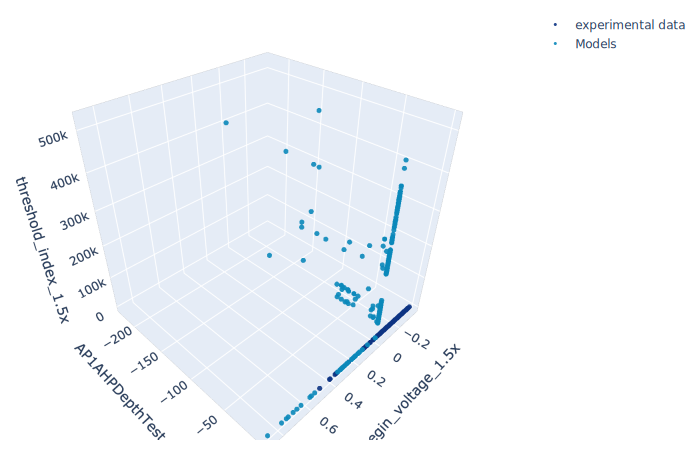

In [81]:
# SQL output is imported as a dataframe variable called 'df'
#import pandas as pd
#import plotly.plotly as py
import plotly.graph_objs as go

# 3D scatter plot. Resource: https://plot.ly/python/3d-scatter-plots/
theme = px.colors.diverging.Portland

experimental_data = go.Scatter3d(
    x = df_data['sag_ratio1_3.0x'],
    y = df_data['AP1RateOfChangePeakToTroughTest_3.0x'],
    z = df_data['threshold_index_1.5x'],
    mode ='markers',
    name = 'experimental data',
    marker =dict(
      color = theme[0],
      size = 3,
      opacity = 0.9
    )
)



models = go.Scatter3d(
    x = experiment_df['sag_ratio1_3.0x'],
    y = experiment_df['AP1RateOfChangePeakToTroughTest_3.0x'],
    z = experiment_df['threshold_index_1.5x'],
    mode ='markers',
    name = 'Models',
    marker =dict(
      color = theme[1],
      size = 3,
      opacity = 0.9
    )
)

data = [experimental_data , models]
layout = go.Layout(
   scene = dict(xaxis = dict(title='AP_begin_voltage_1.5x'),
                yaxis = dict(title='AP1AHPDepthTest_1.5x'),
                zaxis = dict(title='threshold_index_1.5x'),),
    margin=dict(
        l=10,
        r=10,
        b=10,
        t=10
    )
)
fig = go.Figure(data=data, layout=layout)
df_o_m3
# Use Periscope to visualize a dataframe, text, or an image by passing data to periscope.table(), periscope.text(), or periscope.image() respectively.
#py.show(fig)
#py.plot(fig, filename='data_only_3D_scatter.html') 


if GITHUB:
    fig.show("svg")
else:
    fig.show()


As I wrote above Random Forest Variance explained, tells us the dimensions of the Druckman feature space that most strongly assist in classifying models versus data. When we identify features that seperate models and data using Variance Explained, we are then able to iteratively variables that contribute more heavily to data variance. We can remove variables that explain most variance, until machine classification can no longer tell models and data apart, leaving us with a small list of tests which models need to perform better on, these tests correspond to measurable electrical properties of cells that need to be better aligned with data.

Two such measurable electrical properties are Druckman features with high variance explained are re: "Input Resistance" in models and data, as well as "AP2RateOfChangePeakToTroughTest". This second dimension called AP2RateOfChangePeakToTroughTest means: when considering multi-spiking waveforms observed, at the second Action Potential/Spike, how rapid is the average decay from peak to trough of the second AP wave. Since Action Potential wave attack and decay shapes are non-linear, the instantaneous gradient from the peak of the wave is not informative, and it is more useful to measure the time interval needed needed for a decay from a spike, to a state of hyperpolarization, corresponding to a neurons "refractory-period".

Already, we are have arrived at useful information, pertaining to the point of the exercise, as we now have a small list of electrical tests, that we want optimized models to perform better on, such that models and data will be more aligned with each other.

As neural modelers with a great interest in mimicing a diverse range of experimental data using models. The least convincing aspects of our models as mimics of data, are these top ten features. In other words the least convincing aspects of our models are: AP2RateOfChangePeakToTroughTest, Input Resistance values (a scalar), and the amplitude of the first and second spike.





# Prediction Results When I Use Random Forests on all 51 feaature dimensions
* remember that our ground truth labels are booleans that are defined like this:
groundtruth = np.array(df_combined.index.isin(experiment_idx))
Which is labeled as "True" for this data point is an experiment, and "False" for this data point is a model.
Machine classification can successfuly discrimate that our optimized cells are models and not data (this is bad news for us).

In this context in order to bolster out optimized models, a high ***false-negative*** rate is desirable. Unfortunately for us, that is not what we see. The Random Forest Classifier (RFC) correctly identies that all 11 of the new optimized cells are not derived from experiments (they are models). That is bad news for us.


In [82]:
df_o_m.columns;


In [83]:
rfc = RandomForestClassifier()
X = df_combined.values
X;

In [84]:
df_o_m.values;

# > 99%
of models are classified as models when optimized models are not included.

If the random forest is trained on the optimized models too
Then the area under the ROC curve becomes closer to 1. 


When we feed in the 7 new optimized models as "validation data", in this context, the RFC is still okay at classifying our new models correctly as models, and not data. However, the RFC performance is significanlty worse, as the optimized cells have tricked the RFC ***4*** times.

Also since the output of the TSNE-PCA varies with each run, as it is seeded with a psuedo random numnber generator, the projection space that the RFC acts on is different each time. Meaning that the ***FPR*** and the ***TPR*** rates vary slightly on each run.



# In the plot below we show the we show the decision boundary as used by our classifier.

The decision boundary llows us to see if the newer optimized models are classified as data or models



In [85]:
import plotly.express as px
import plotly.graph_objects as go
from sklearn import metrics


* Blue means experimental data, red means model, as machine categorized using Sklearns Random Forest classifier.

A general trend is apparent at the macro scale. It seems as if the bottom 2/3rds of the plane belong to data, and the remaining upper 1/3rd of the plane belongs to models, however you can also see on a micro scale there are lots of small pockets, or islands of model decision territory inside, what is more generally regarded as data territory.

Although the large red dots, appear in the correct side of the macro decision boundary, zooming in would reveal that these optimized models are in fact enveloped by model island that is excatly small enough to contain them. Therefore random forest classification, correctly classifies the optimized models as models.

# The above figure allows us
To argue that the newer optimized models are closer to cluster centres and often fall on the experimental data side of the decision boundary.


# Lets switch back to using all 38 features to classify
Only as its easier for me to debug, and I can make progress more quickly.
Using cross validation below you can see that this approach is generalizable.

In [86]:
len(groundtruth)
groundtruth
df_combined.head()

AP1RateOfChangePeakToTroughTest_3.0x  AP2DelaySDTest_1.5x  \
313861539                                 0.009                0.325   
313861677                                 0.017               -0.031   
313862167                                 0.014               -0.025   
313862167                                 0.014               -0.025   
313862167                                 0.006               -0.011   

           AP2DelaySDTest_3.0x  AP_end_indices_3.0x  AP_fall_indices_1.5x  \
313861539                0.325                0.053                 0.079   
313861677               -0.031               -0.239                -0.158   
313862167               -0.025                0.065                 0.064   
313862167               -0.025                0.065                 0.064   
313862167               -0.011               -0.343                 0.028   

           AP_fall_indices_3.0x  AP_rise_indices_1.5x  AP_rise_time_1.5x  \
313861539                 0.053                 0.077             -0.009   
313861677                -0.232                -0.146             -0.014   
313862167                 0.065                 0.064             -0.012   
313862167                 0.065                 0.064             -0.012   
313862167                -0.334                 0.028             -0.005   

           AP_rise_time_3.0x  APlast_width_1.5x  ...  threshold_index_1.5x  \
313861539             -0.005             -0.002  ...                 0.233   
313861677             -0.007             -0.004  ...                 0.229   
313862167             -0.007             -0.004  ...                 0.304   
313862167             -0.007             -0.004  ...                 0.304   
313862167             -0.005             -0.002  ...                 0.131   

           threshold_index_3.0x  threshold_t_1.5x  threshold_t_3.0x  \
313861539                 0.212             0.086             0.073   
313861677                 0.193             0.027             0.003   
313862167                 0.297             0.103             0.100   
313862167                 0.297             0.103             0.100   
313862167                 0.128             0.044             0.043   

           upstroke_index_1.5x  upstroke_index_3.0x  upstroke_t_1.5x  \
313861539                0.233                0.212            0.086   
313861677                0.229                0.193            0.027   
313862167                0.304                0.297            0.103   
313862167                0.304                0.297            0.103   
313862167                0.131                0.128            0.044   

           upstroke_t_3.0x  voltage_after_stim_1.5x  voltage_after_stim_3.0x  
313861539            0.073                    0.133                    0.123  
313861677            0.003                    0.032                    0.007  
313862167            0.100                   -0.100                   -0.098  
313862167            0.100                   -0.100                   -0.098  
313862167            0.043                   -0.043                    0.485  

[5 rows x 47 columns]

In [87]:
from sklearn.model_selection import train_test_split
for i in range(0,10):
    X_train, X_test, y_train, y_test = train_test_split(df_combined.values, groundtruth, test_size=0.5, random_state=42)    

rfc = RandomForestClassifier()

# All 7 seven new models are classified as data

Ie it is false that they are percieved as models, its true that they are percieved as data.

# This will enable us to use a cross-validation Approach.
Cross-validation will help us to check the generalizability of our model, by better navigating the bias-variance tradeoff.

# Report on misclassification.
Even though RFC can be over-fit by using all the data over 148 features a False negative is still sometimes reported.
Experimental data point with identifier: "482764620" is sometimes falsely classified as a model, but we know from ground truth that it is an experiment.

The outputs of thistest are a bit different each time.

### Repeat above with just experimental data

In [88]:
model_df[:] = ss.fit_transform(model_no_trans_df.values);


